In [1]:
import scanpy as sc
import squidpy as sq
import os

In [2]:
import sys
sys.path.append('/home/augusta/SSS_mount/insituCNV/InSituCNV/modules')
sys.path

['/home/augusta/SSS_mount/insituCNV/InSituCNV/Figure2/03_Run_inferCNV',
 '/home/augusta/anaconda3/envs/scanpy_env/lib/python311.zip',
 '/home/augusta/anaconda3/envs/scanpy_env/lib/python3.11',
 '/home/augusta/anaconda3/envs/scanpy_env/lib/python3.11/lib-dynload',
 '',
 '/home/augusta/anaconda3/envs/scanpy_env/lib/python3.11/site-packages',
 '/home/augusta/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/setuptools/_vendor',
 '/home/augusta/SSS_mount/insituCNV/InSituCNV/modules']

# Load adata

In [2]:
adata_path = "/home/augusta/SSS_mount/insituCNV/InSituCNV/Figure2/01_Simulate_CNVs_in_spatial_data/Simulate_CNVs/Xenium_HumanLymphNode_5K_simulatedCNVs_291024.h5ad"
adata = sc.read_h5ad(adata_path)

In [3]:
adata

AnnData object with n_obs × n_vars = 16058 × 4624
    obs: 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'group', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'leiden', 'simulated_subclone'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'gene_names', 'chromosome', 'start', 'end'
    uns: 'group_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'CNV_GT', 'CNV_simulated', 'counts'
    obsp: 'connectivities', 'distance

In [4]:
import numpy as np
adata.layers['zero'] = np.zeros(adata.X.shape)

# Preprocessing

In [5]:
sc.pp.normalize_total(adata, layer='CNV_simulated')

In [6]:
sc.pp.log1p(adata, layer='CNV_simulated')

# inferCNV

In [7]:
import scanpy as sc
import infercnvpy as cnv
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter("ignore")

sc.settings.set_figure_params(figsize=(5, 5))

/home/augusta/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Zero

In [16]:
adata

AnnData object with n_obs × n_vars = 16058 × 4624
    obs: 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'group', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'leiden', 'simulated_subclone', 'cnv_leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'gene_names', 'chromosome', 'start', 'end'
    uns: 'group_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap', 'cnv', 'cnv_neighbors', 'cnv_leiden', 'dendrogram_cnv_leiden', 'cnv_leiden_colors', 'segmentation_method_colors'
    obsm: 'X

In [17]:
# We provide all immune cell types as "normal cells".
cnv.tl.infercnv(
    adata,
    layer='zero',
    window_size=100
)

100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.41it/s]


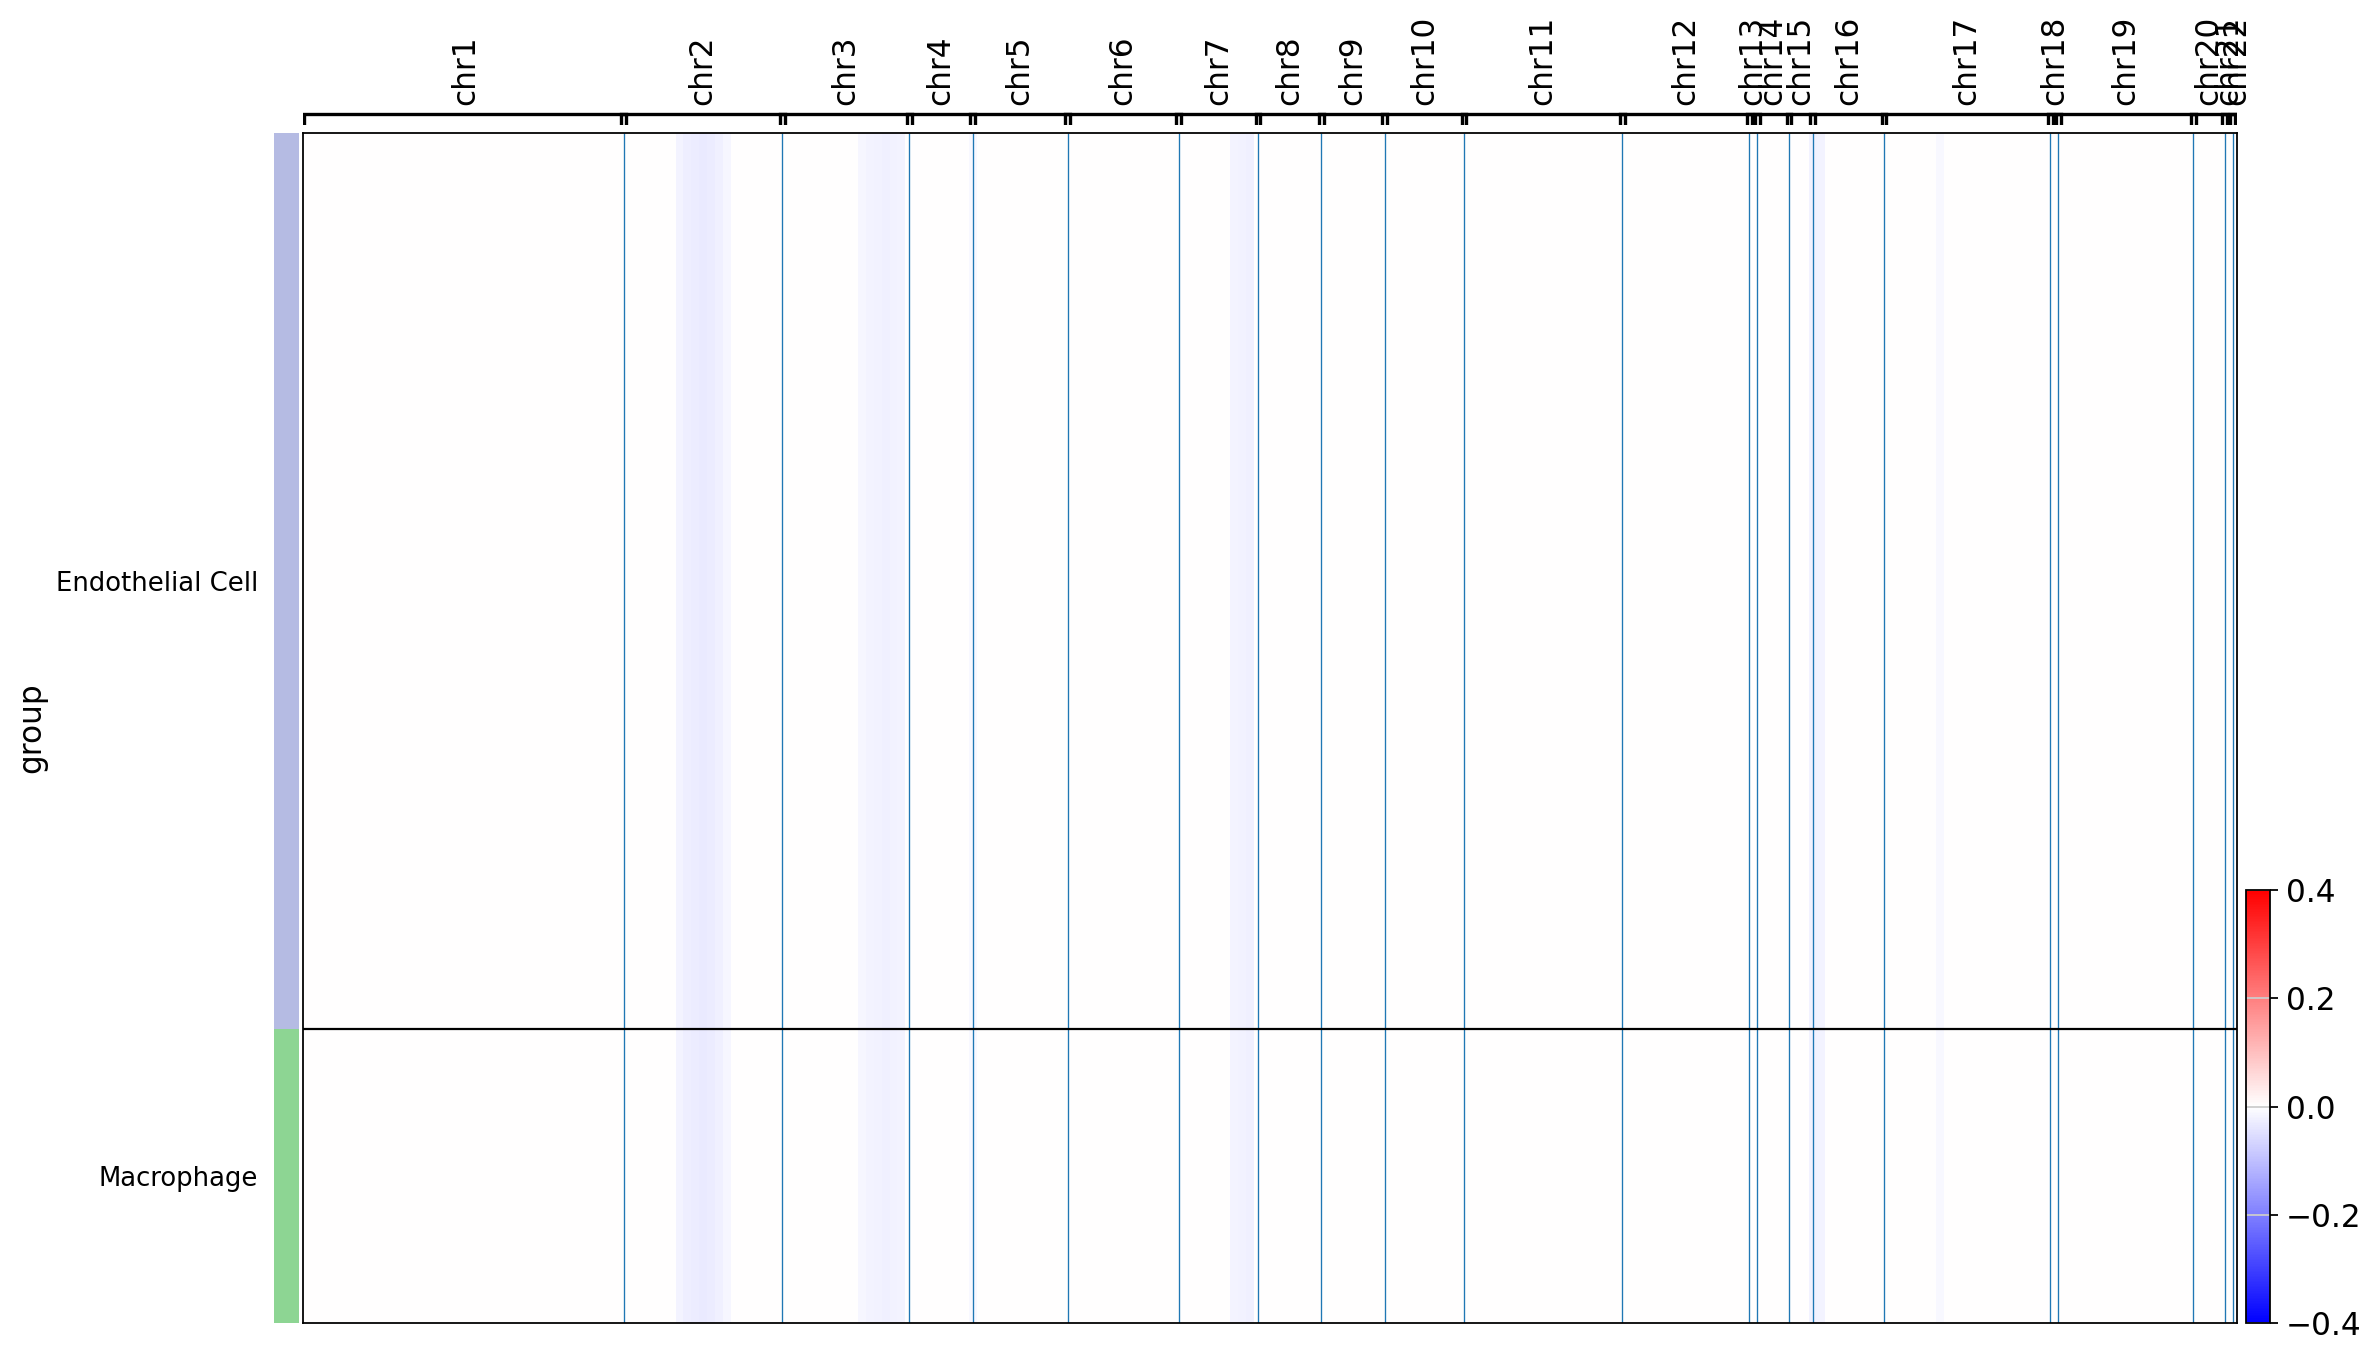

In [18]:
cnv.pl.chromosome_heatmap(adata, groupby="group", vmax=0.4, vmin=-0.4)

### GT

In [8]:
# We provide all immune cell types as "normal cells".
cnv.tl.infercnv(
    adata,
    layer='CNV_GT',
    reference_key="simulated_subclone",
    reference_cat="N",
    window_size=100
)

100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.44it/s]


In [9]:
adata

AnnData object with n_obs × n_vars = 16058 × 4624
    obs: 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'group', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'leiden', 'simulated_subclone'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'gene_names', 'chromosome', 'start', 'end'
    uns: 'group_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap', 'cnv'
    obsm: 'X_pca', 'X_umap', 'spatial', 'X_cnv'
    varm: 'PCs'
    layers: 'CNV_GT', 'CNV_simulated', 'counts', 'zero'
    obsp: 'co

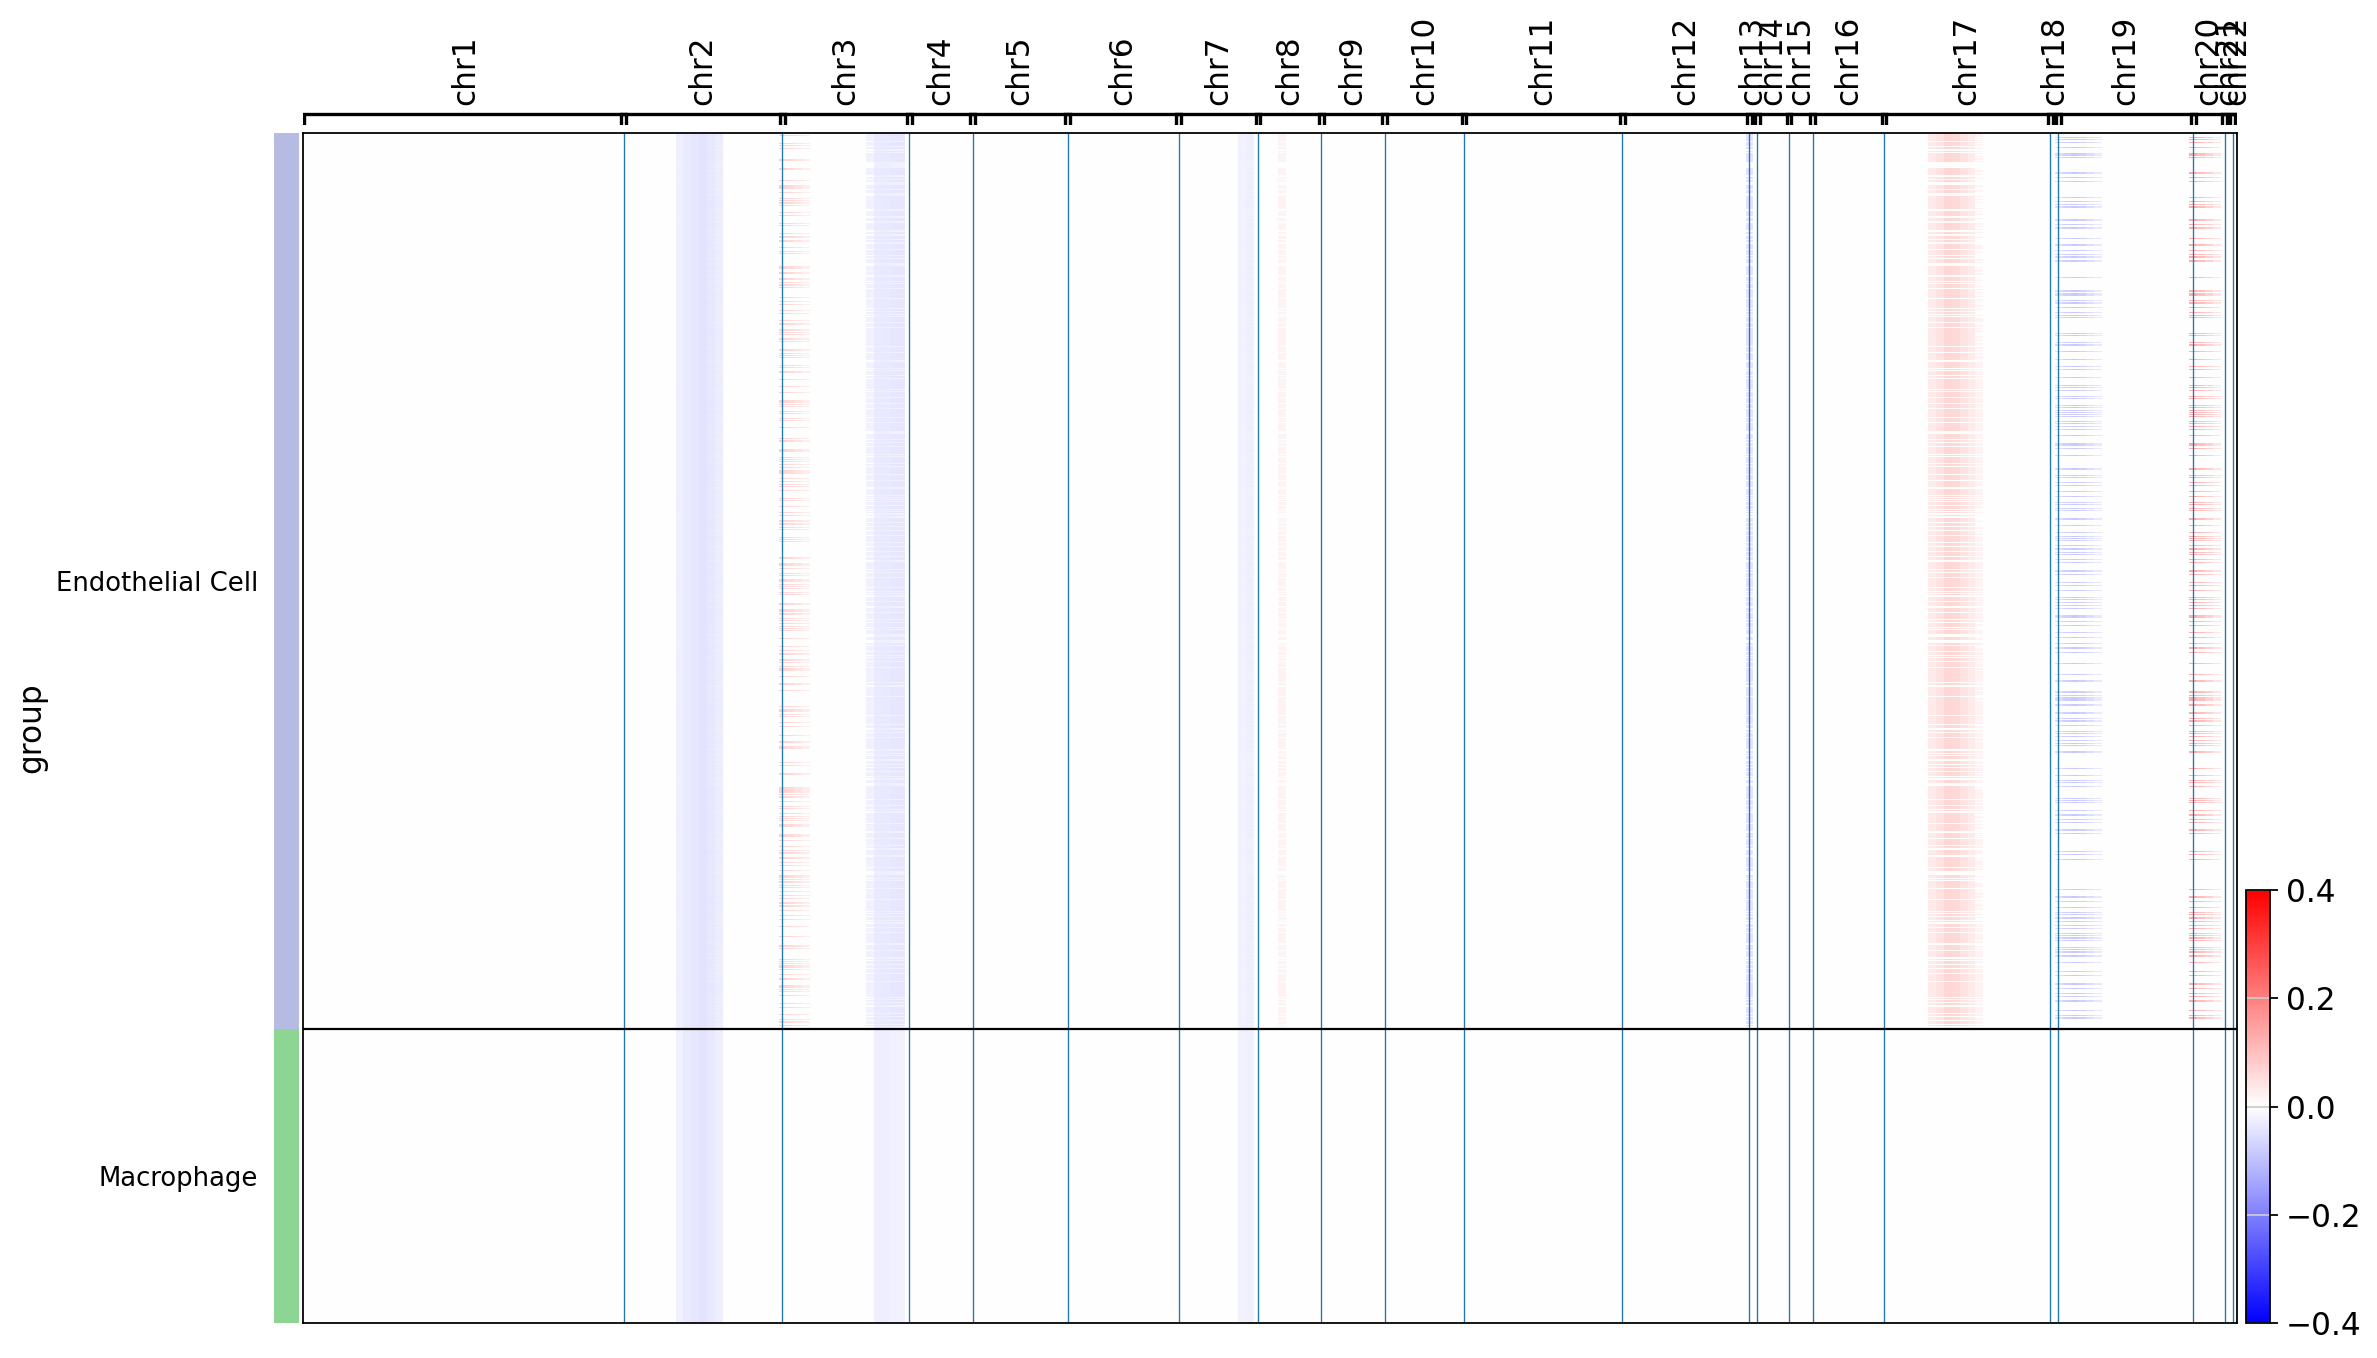

In [15]:
cnv.pl.chromosome_heatmap(adata, groupby="group", vmax=0.4, vmin=-0.4)

In [12]:
cnv.tl.pca(adata)
cnv.pp.neighbors(adata)
cnv.tl.leiden(adata)

categories: 0, 1, 2, etc.
var_group_labels: chr1, chr2, chr3, etc.


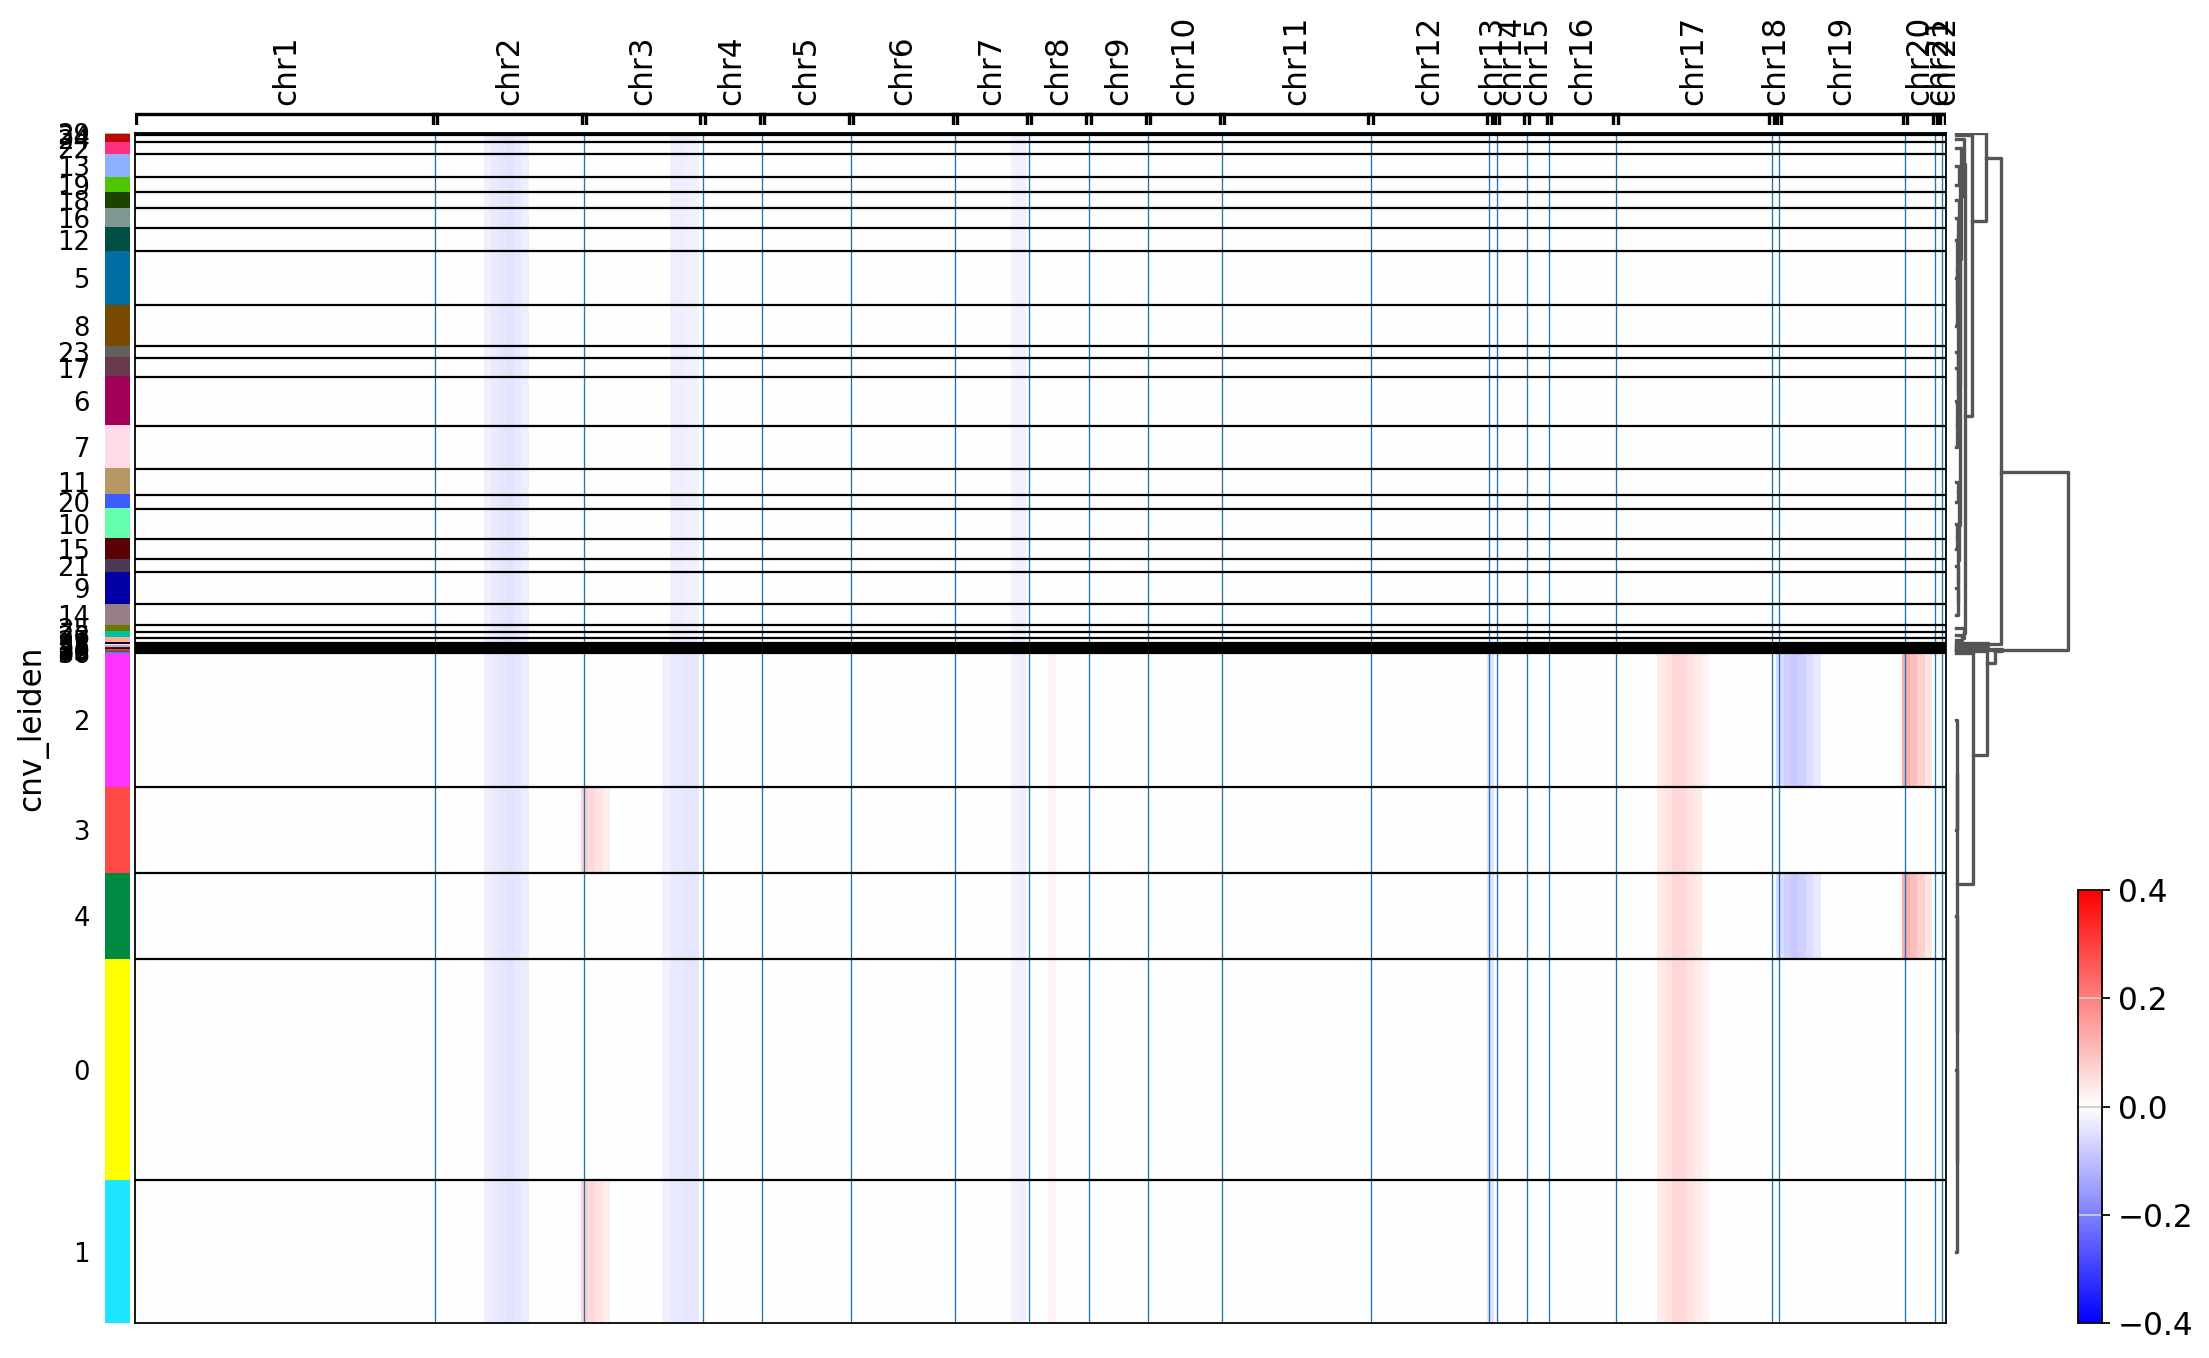

In [13]:
sc.tl.dendrogram(adata,groupby="cnv_leiden")
cnv.pl.chromosome_heatmap(adata, groupby="cnv_leiden", dendrogram=True,  vmax=0.4, vmin=-0.4)

In [18]:
cnv.tl.leiden(adata, resolution=0.1, key_added='cnv_leiden_res0.1')

categories: 0, 1, 2, etc.
var_group_labels: chr1, chr2, chr3, etc.


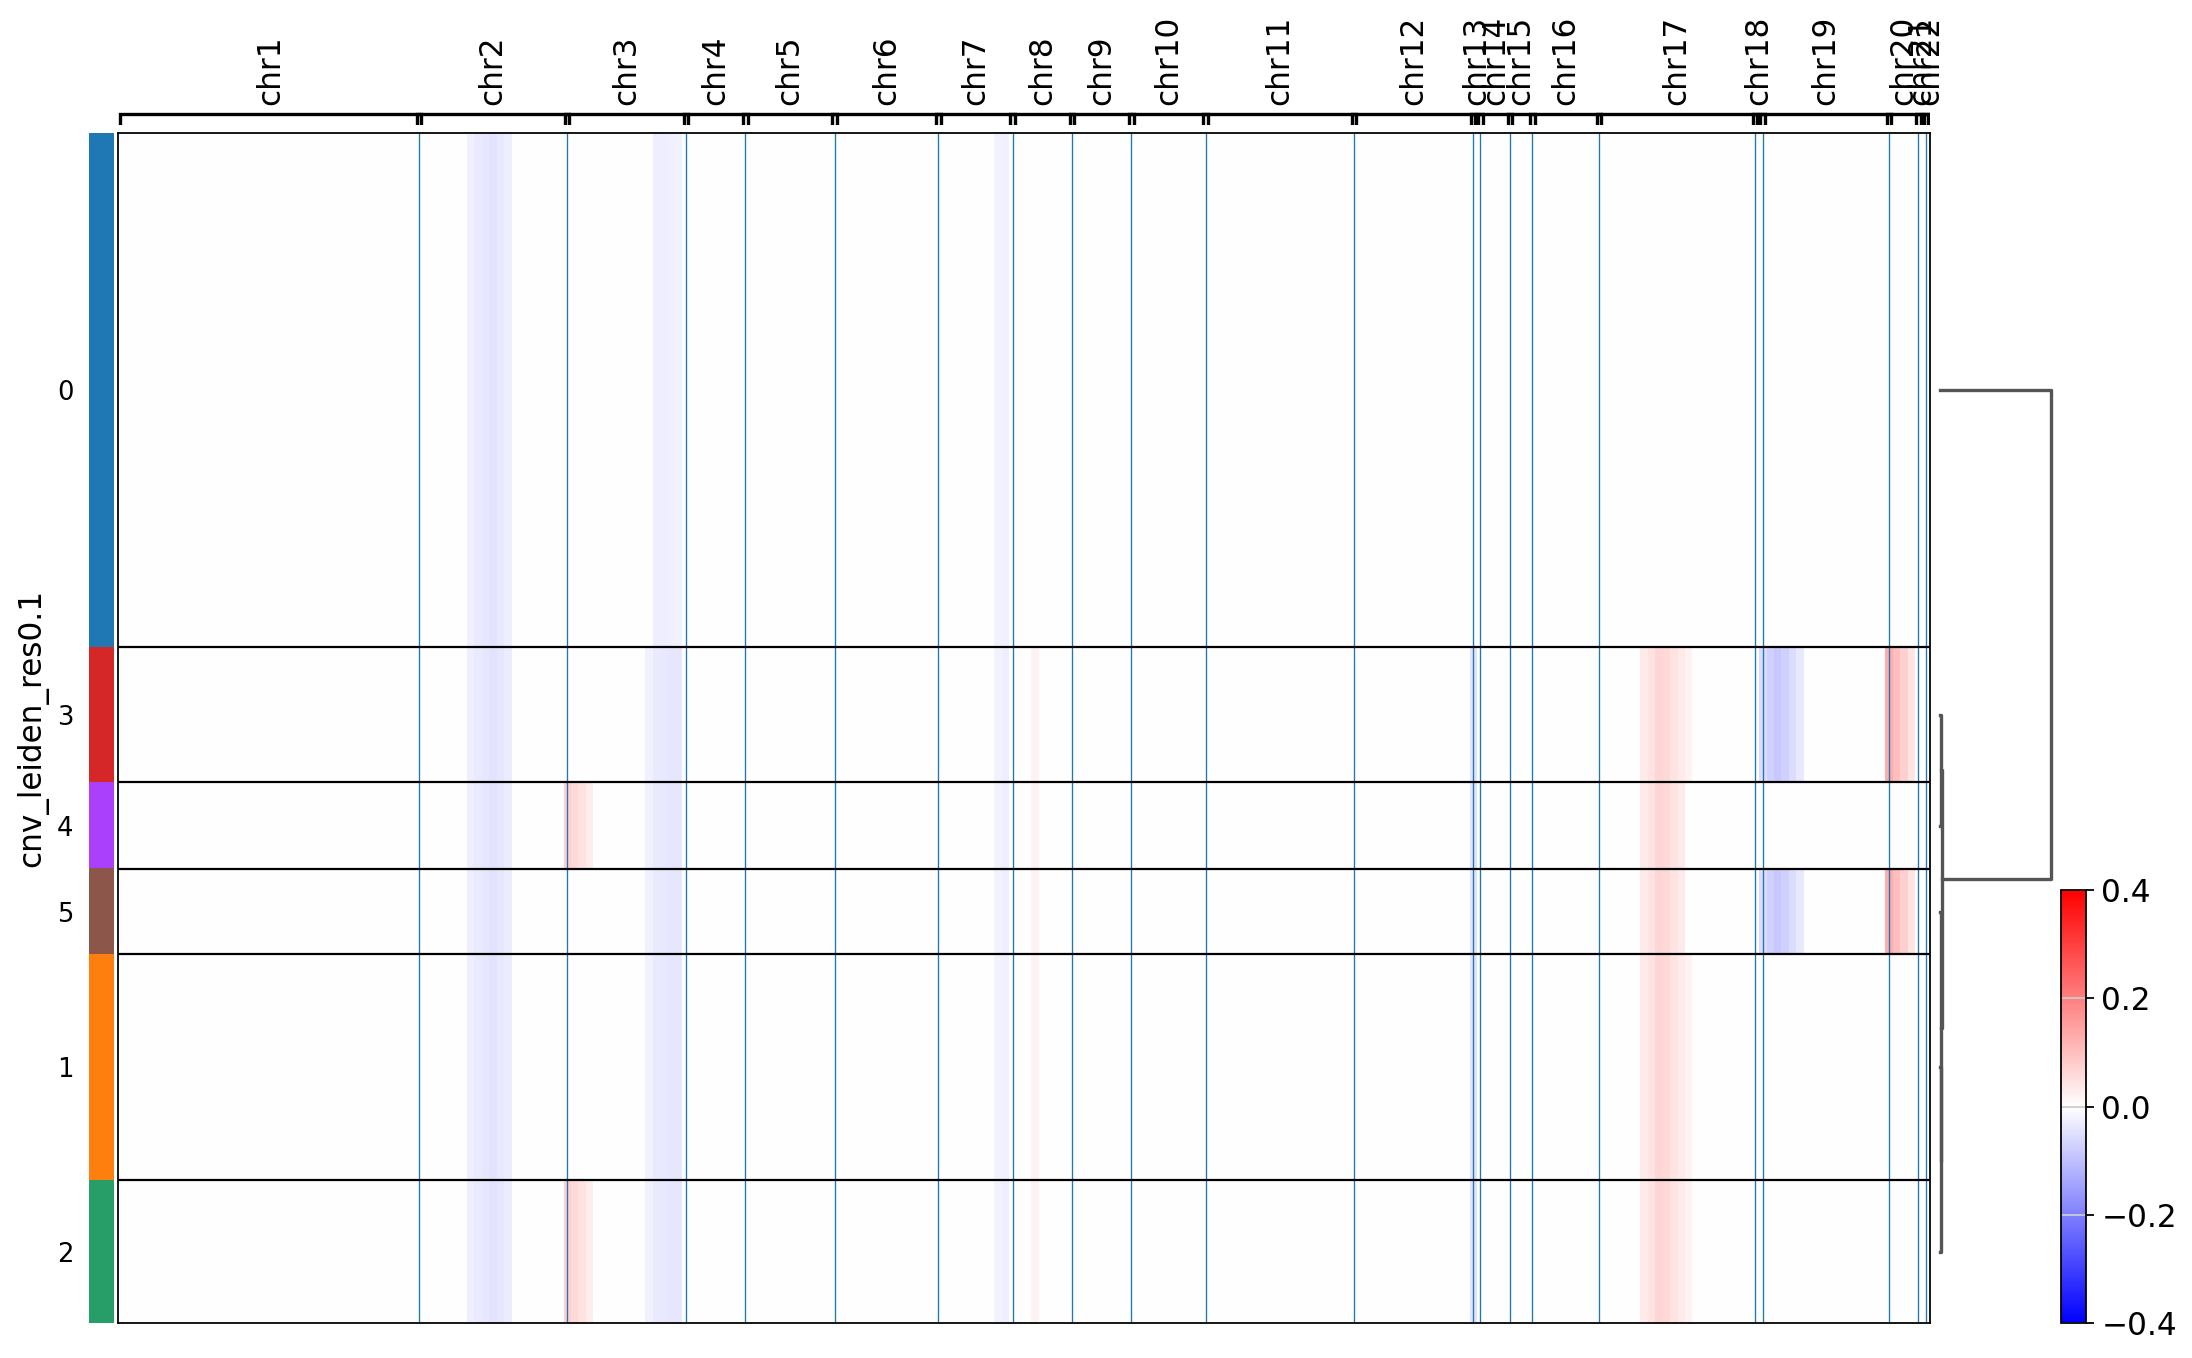

In [19]:
sc.tl.dendrogram(adata,groupby="cnv_leiden_res0.1")
cnv.pl.chromosome_heatmap(adata, groupby="cnv_leiden_res0.1", dendrogram=True, vmax=0.4, vmin=-0.4)

In [20]:
cnv.tl.leiden(adata, resolution=0.05, key_added='cnv_leiden_res0.05')

categories: 0, 1, 2, etc.
var_group_labels: chr1, chr2, chr3, etc.


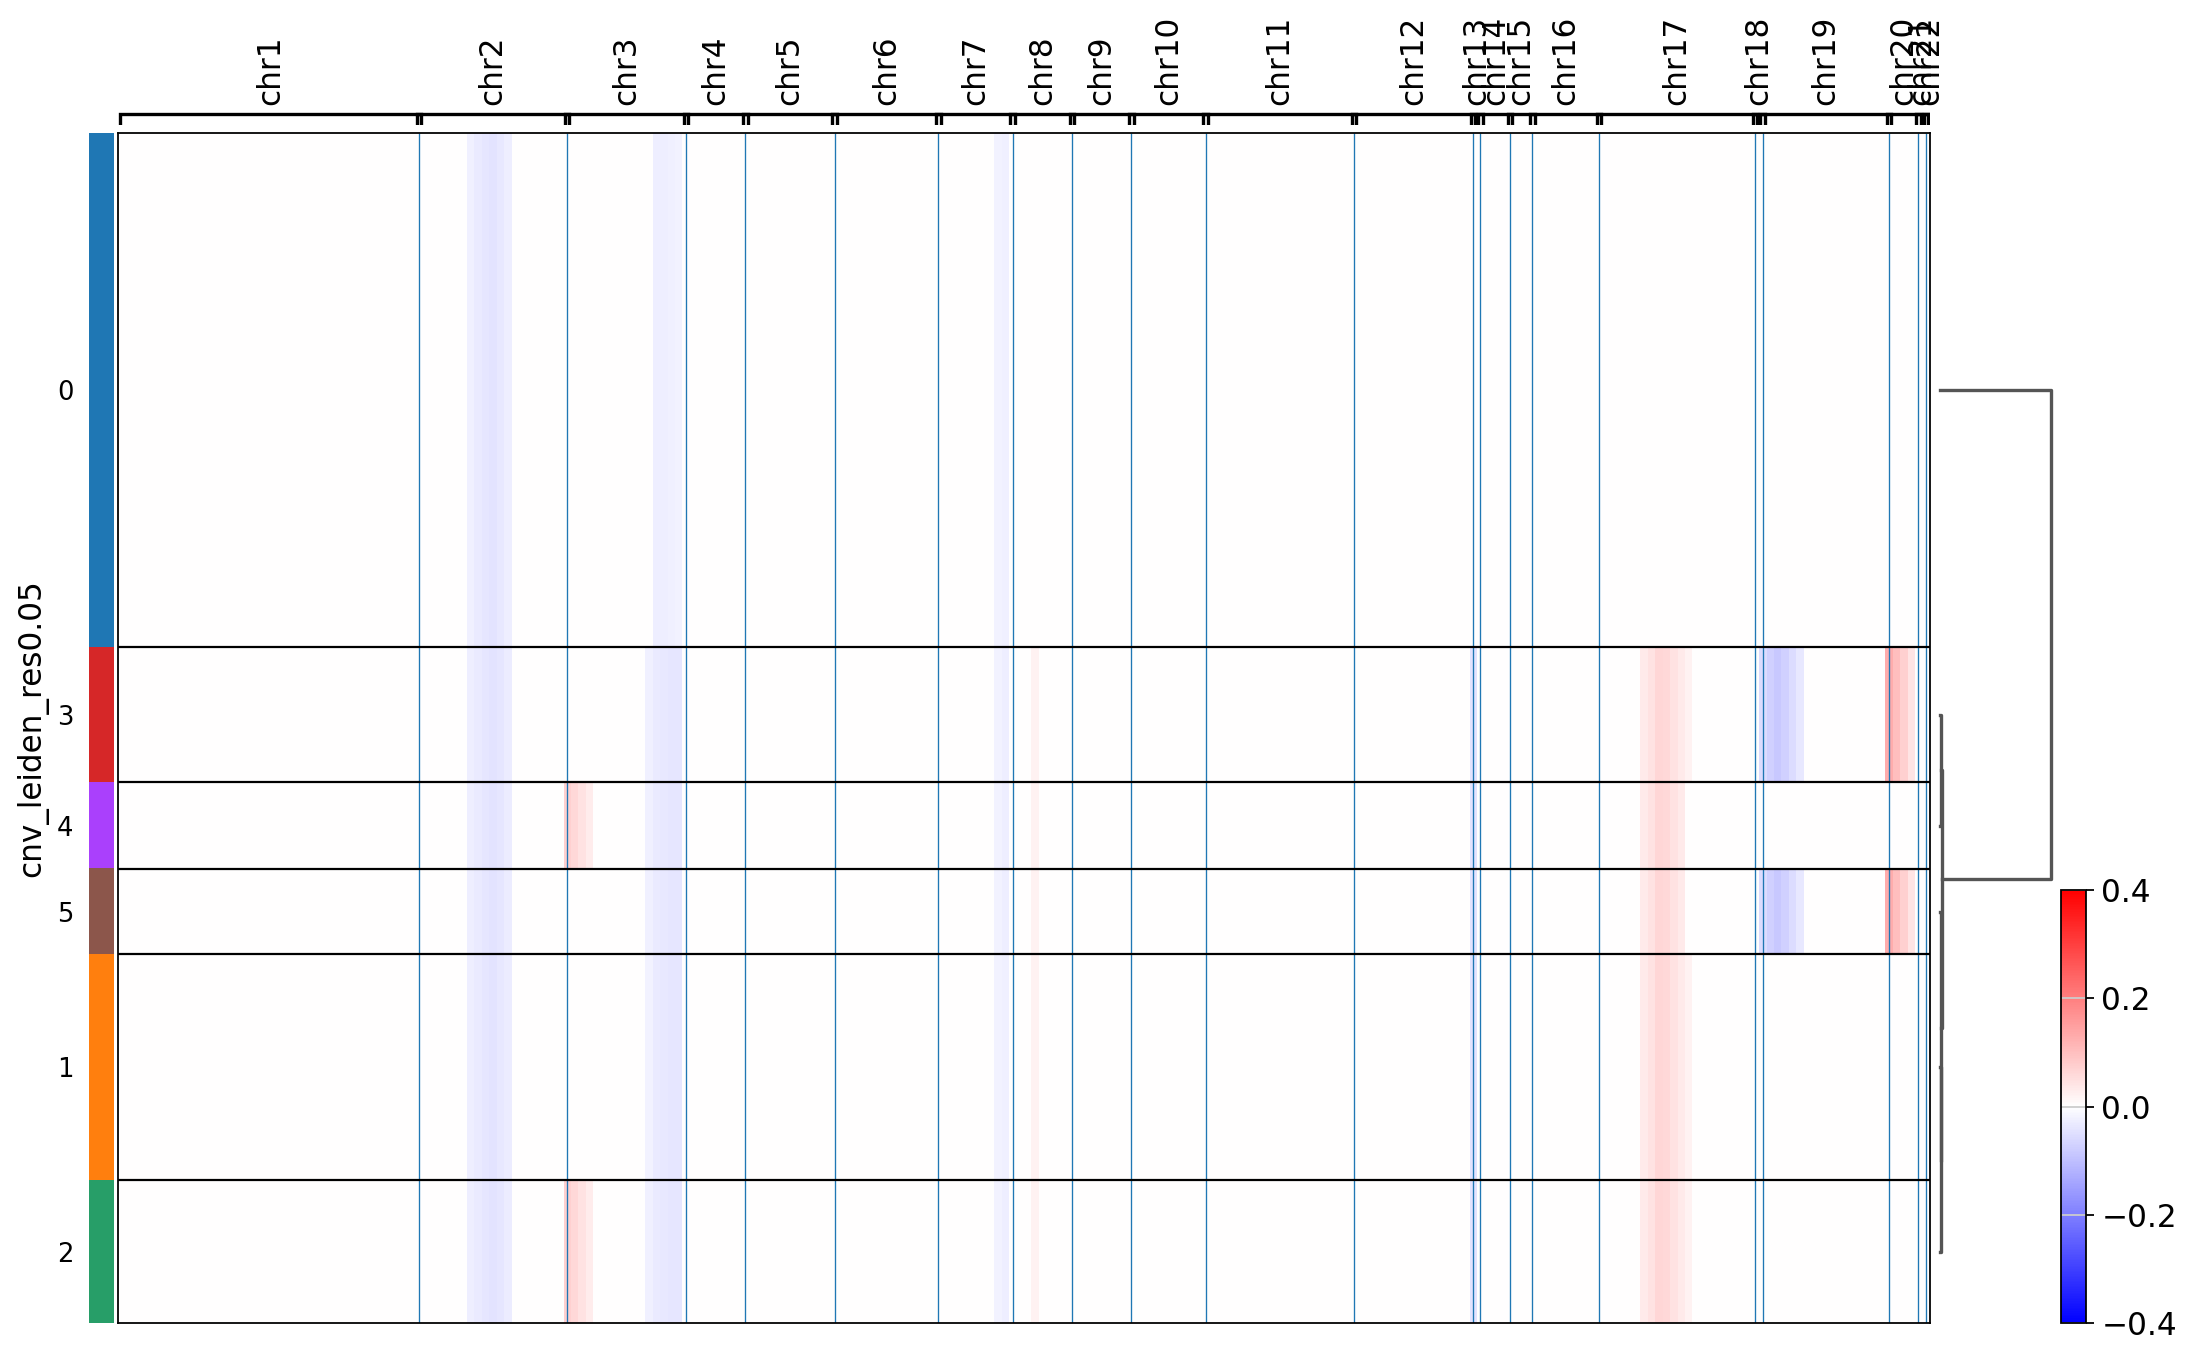

In [21]:
sc.tl.dendrogram(adata,groupby="cnv_leiden_res0.05")
cnv.pl.chromosome_heatmap(adata, groupby="cnv_leiden_res0.05", dendrogram=True, vmax=0.4, vmin=-0.4)

categories: A, B, C, etc.
var_group_labels: chr1, chr2, chr3, etc.


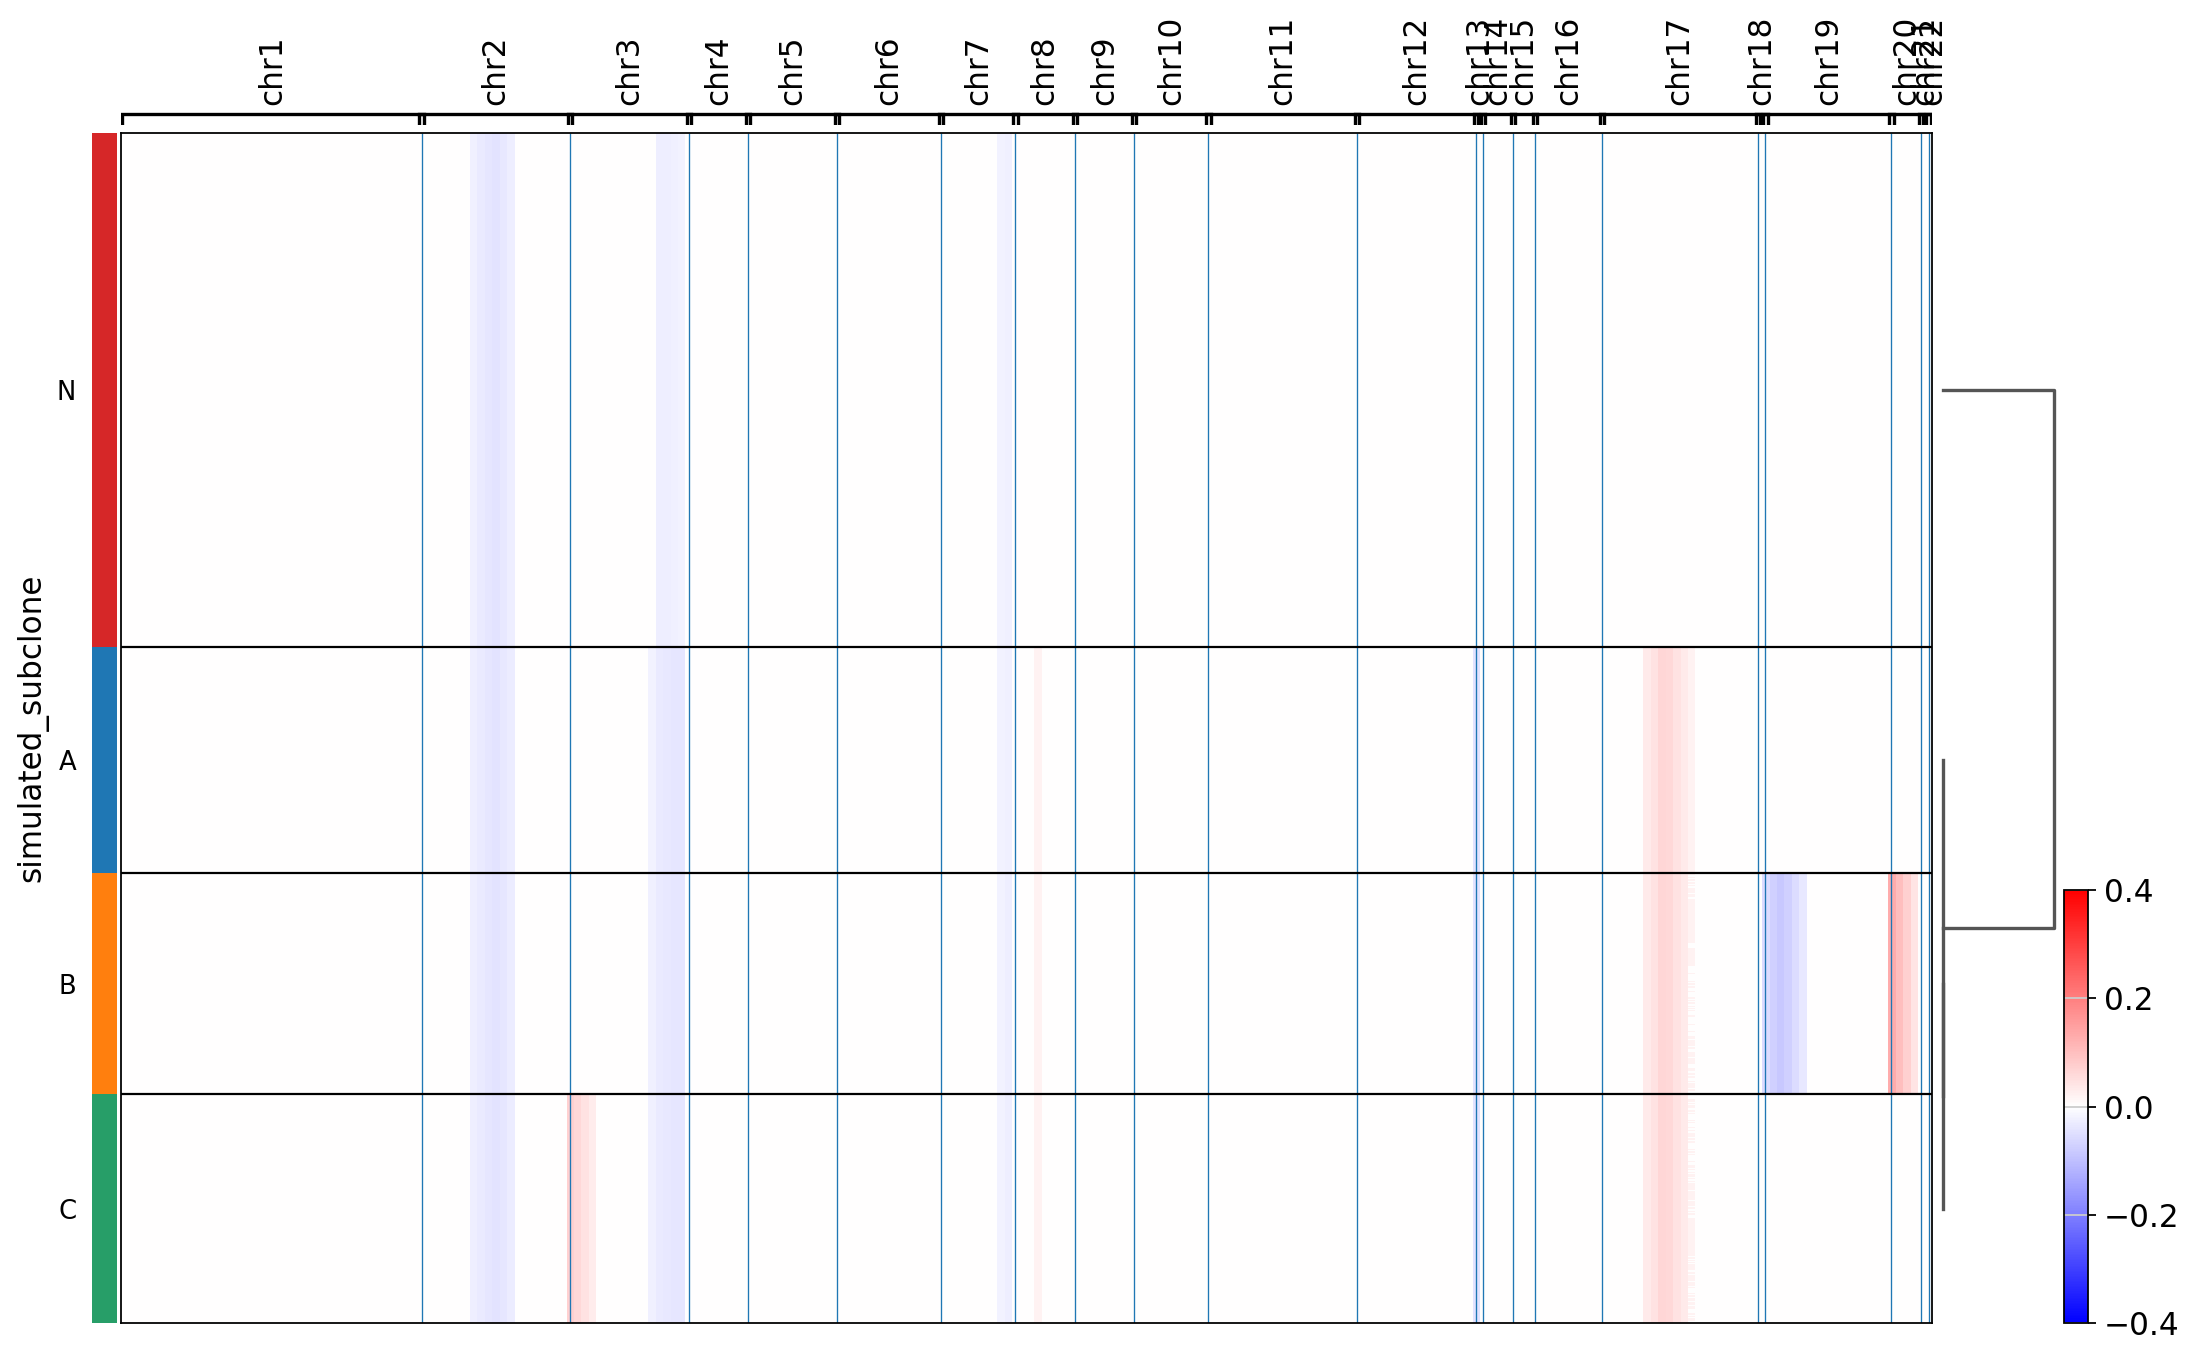

In [22]:
sc.tl.dendrogram(adata,groupby="simulated_subclone")
cnv.pl.chromosome_heatmap(adata, groupby="simulated_subclone", dendrogram=True, vmax=0.4, vmin=-0.4)

### Simulated

In [19]:
# We provide all immune cell types as "normal cells".
cnv.tl.infercnv(
    adata,
    layer='CNV_simulated',
    reference_key="group",
    reference_cat="Macrophage",
    window_size=100
)

100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.18it/s]


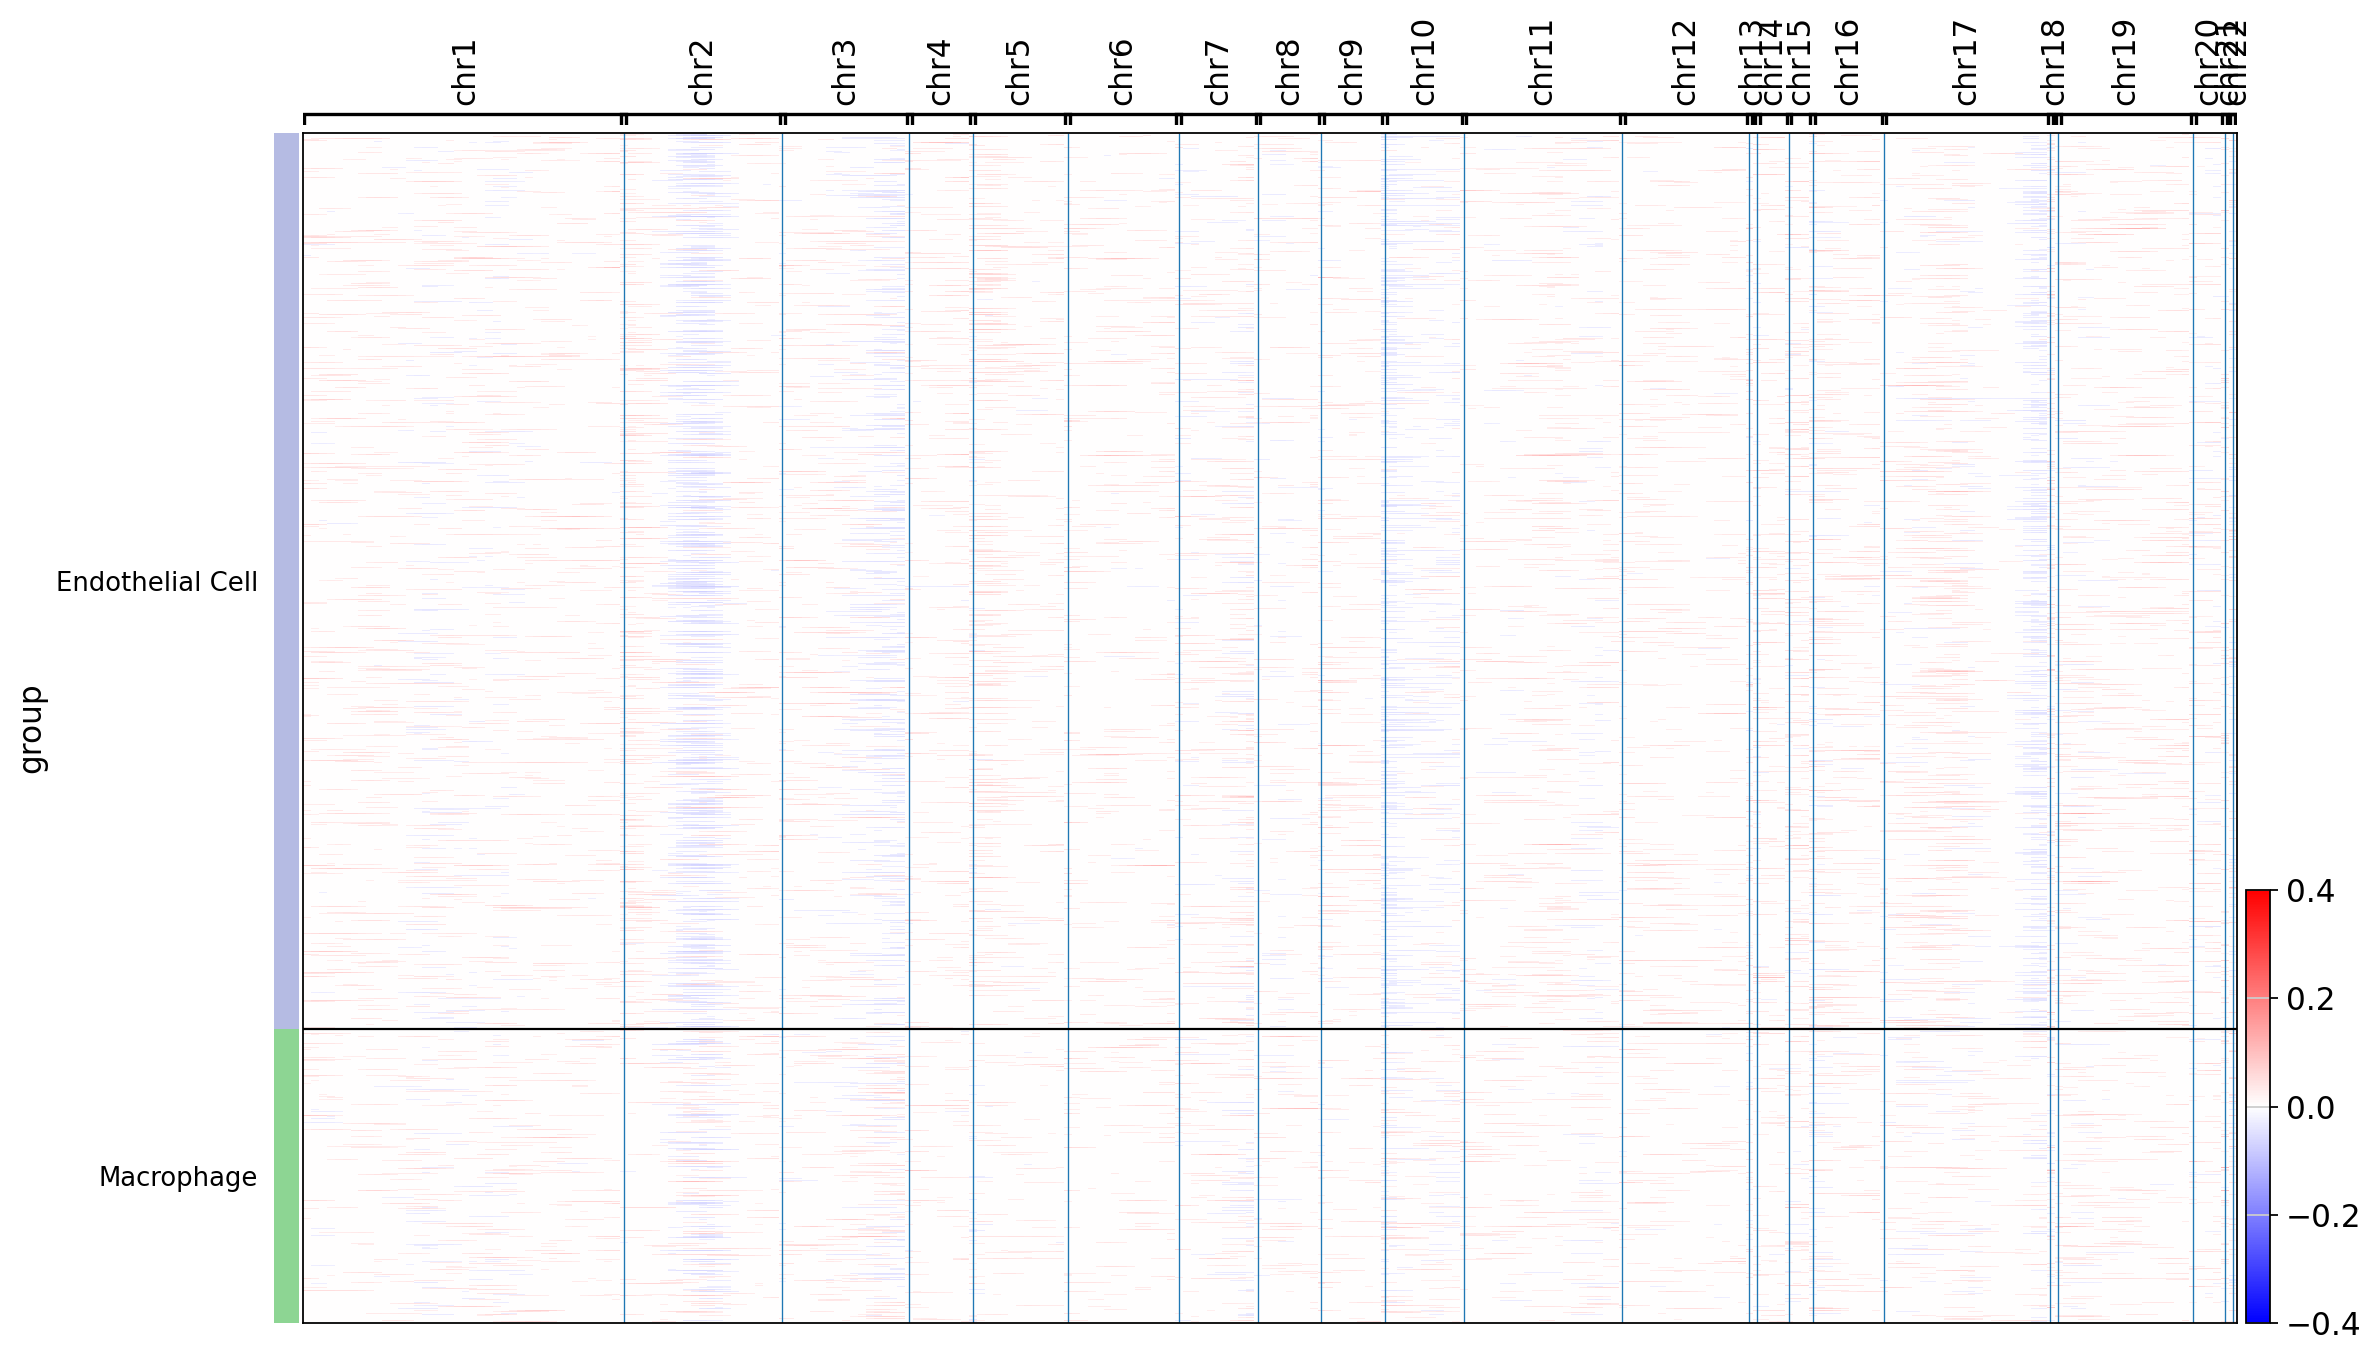

In [23]:
cnv.pl.chromosome_heatmap(adata, groupby="group", vmin=-0.4, vmax=0.4)

In [21]:
cnv.tl.pca(adata)
cnv.pp.neighbors(adata)
cnv.tl.leiden(adata)

categories: 0, 1, 2, etc.
var_group_labels: chr1, chr2, chr3, etc.


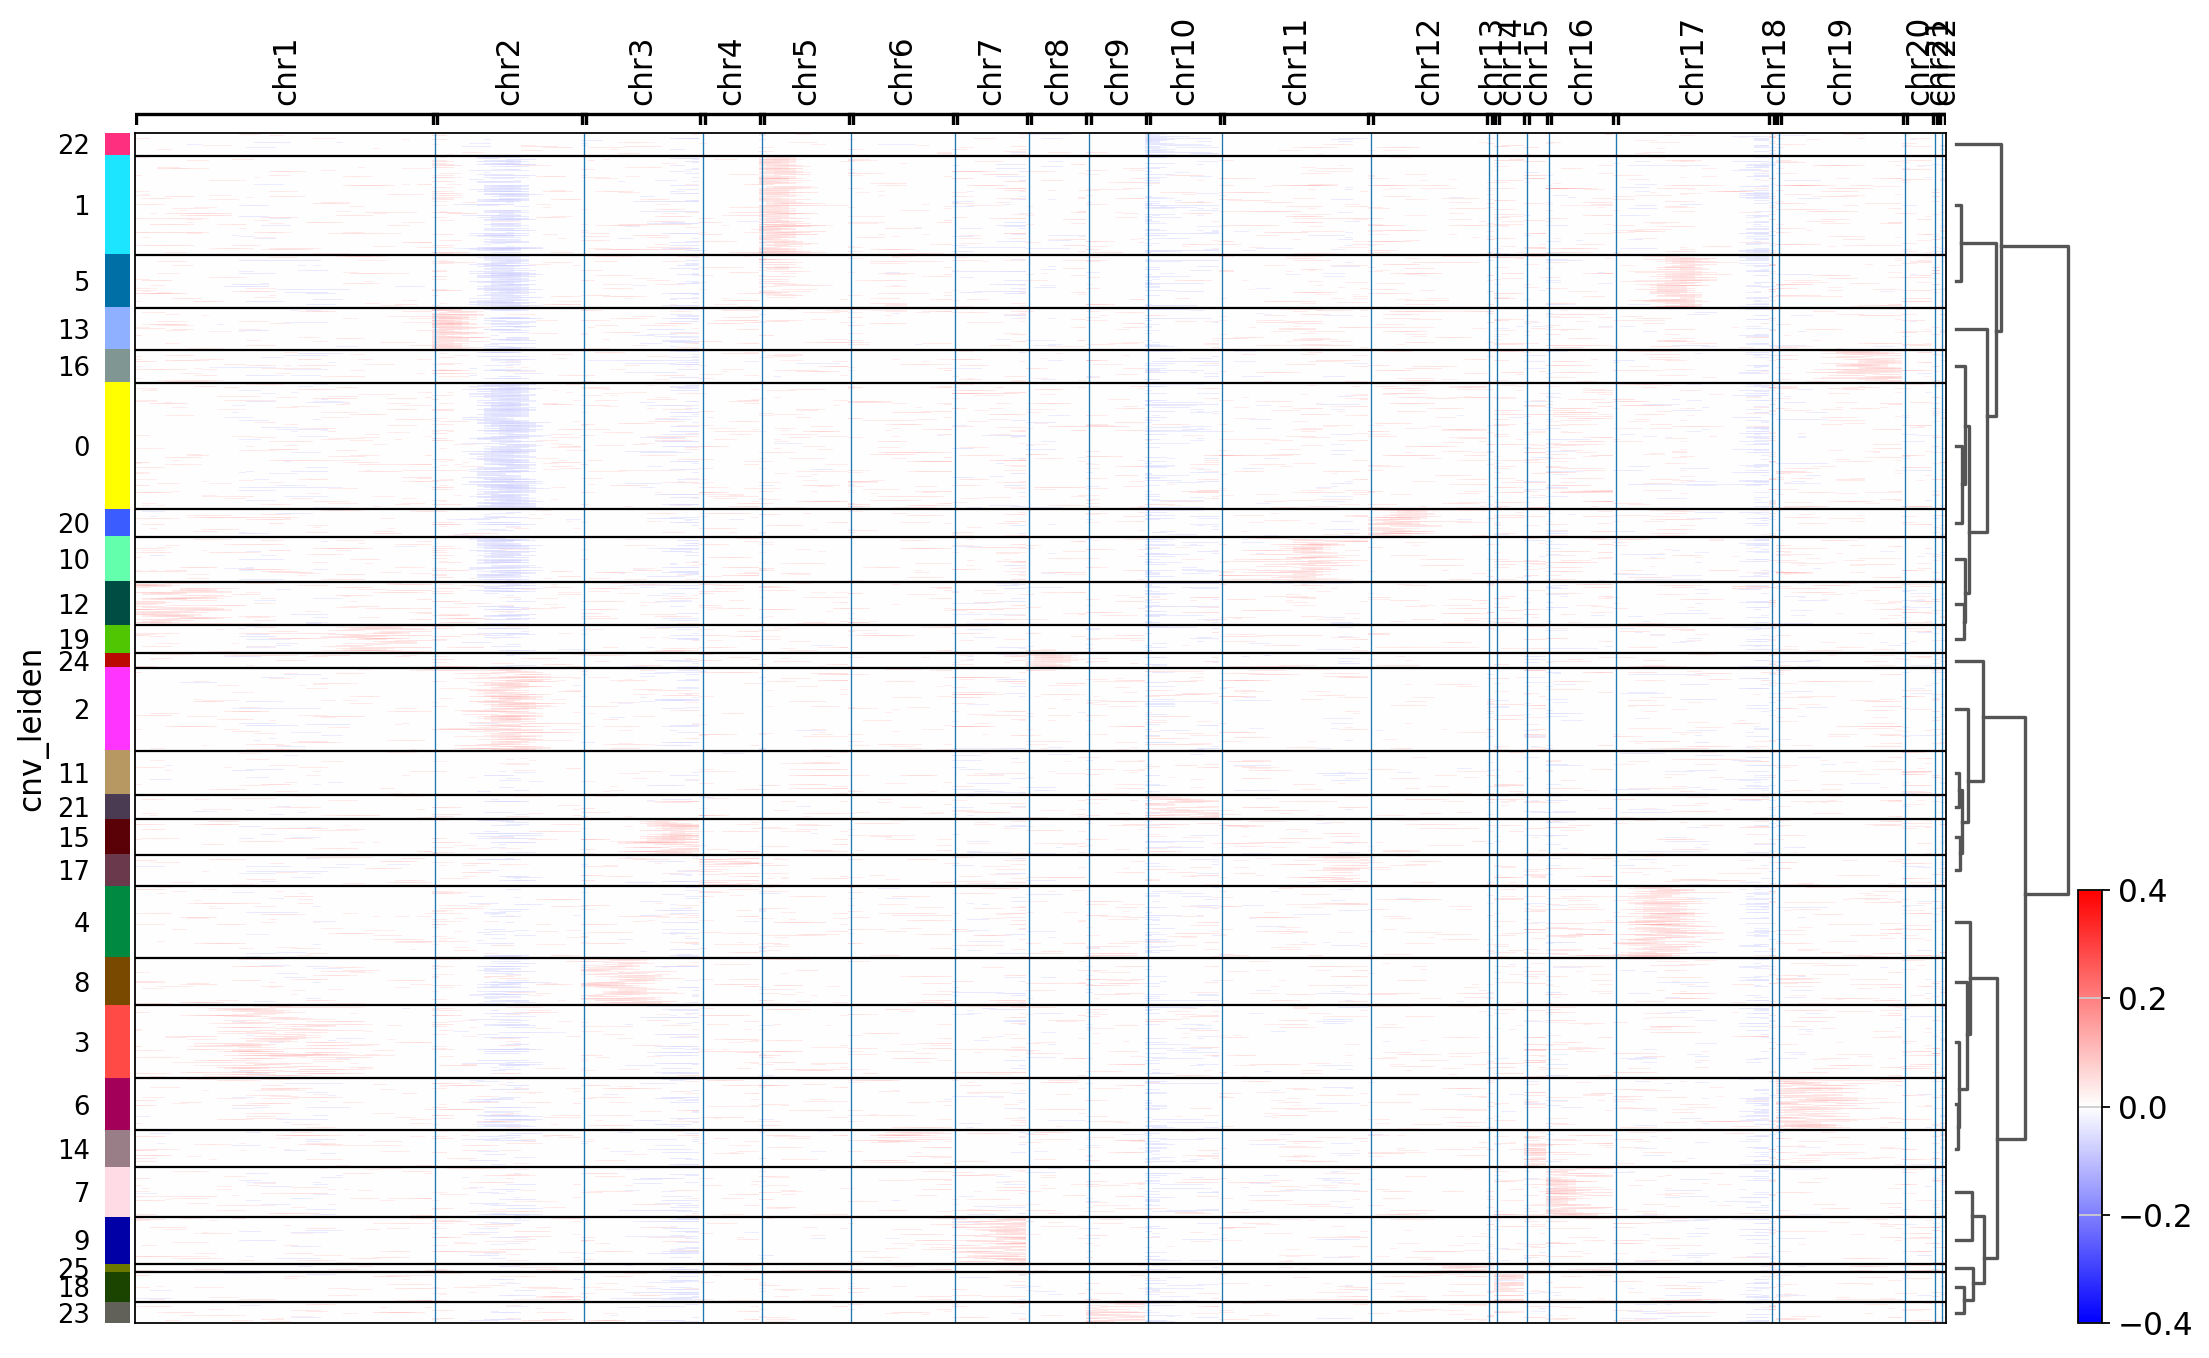

In [24]:
sc.tl.dendrogram(adata,groupby="cnv_leiden")
cnv.pl.chromosome_heatmap(adata, groupby="cnv_leiden", dendrogram=True, vmin=-0.4, vmax=0.4)

categories: A, B, C, etc.
var_group_labels: chr1, chr2, chr3, etc.


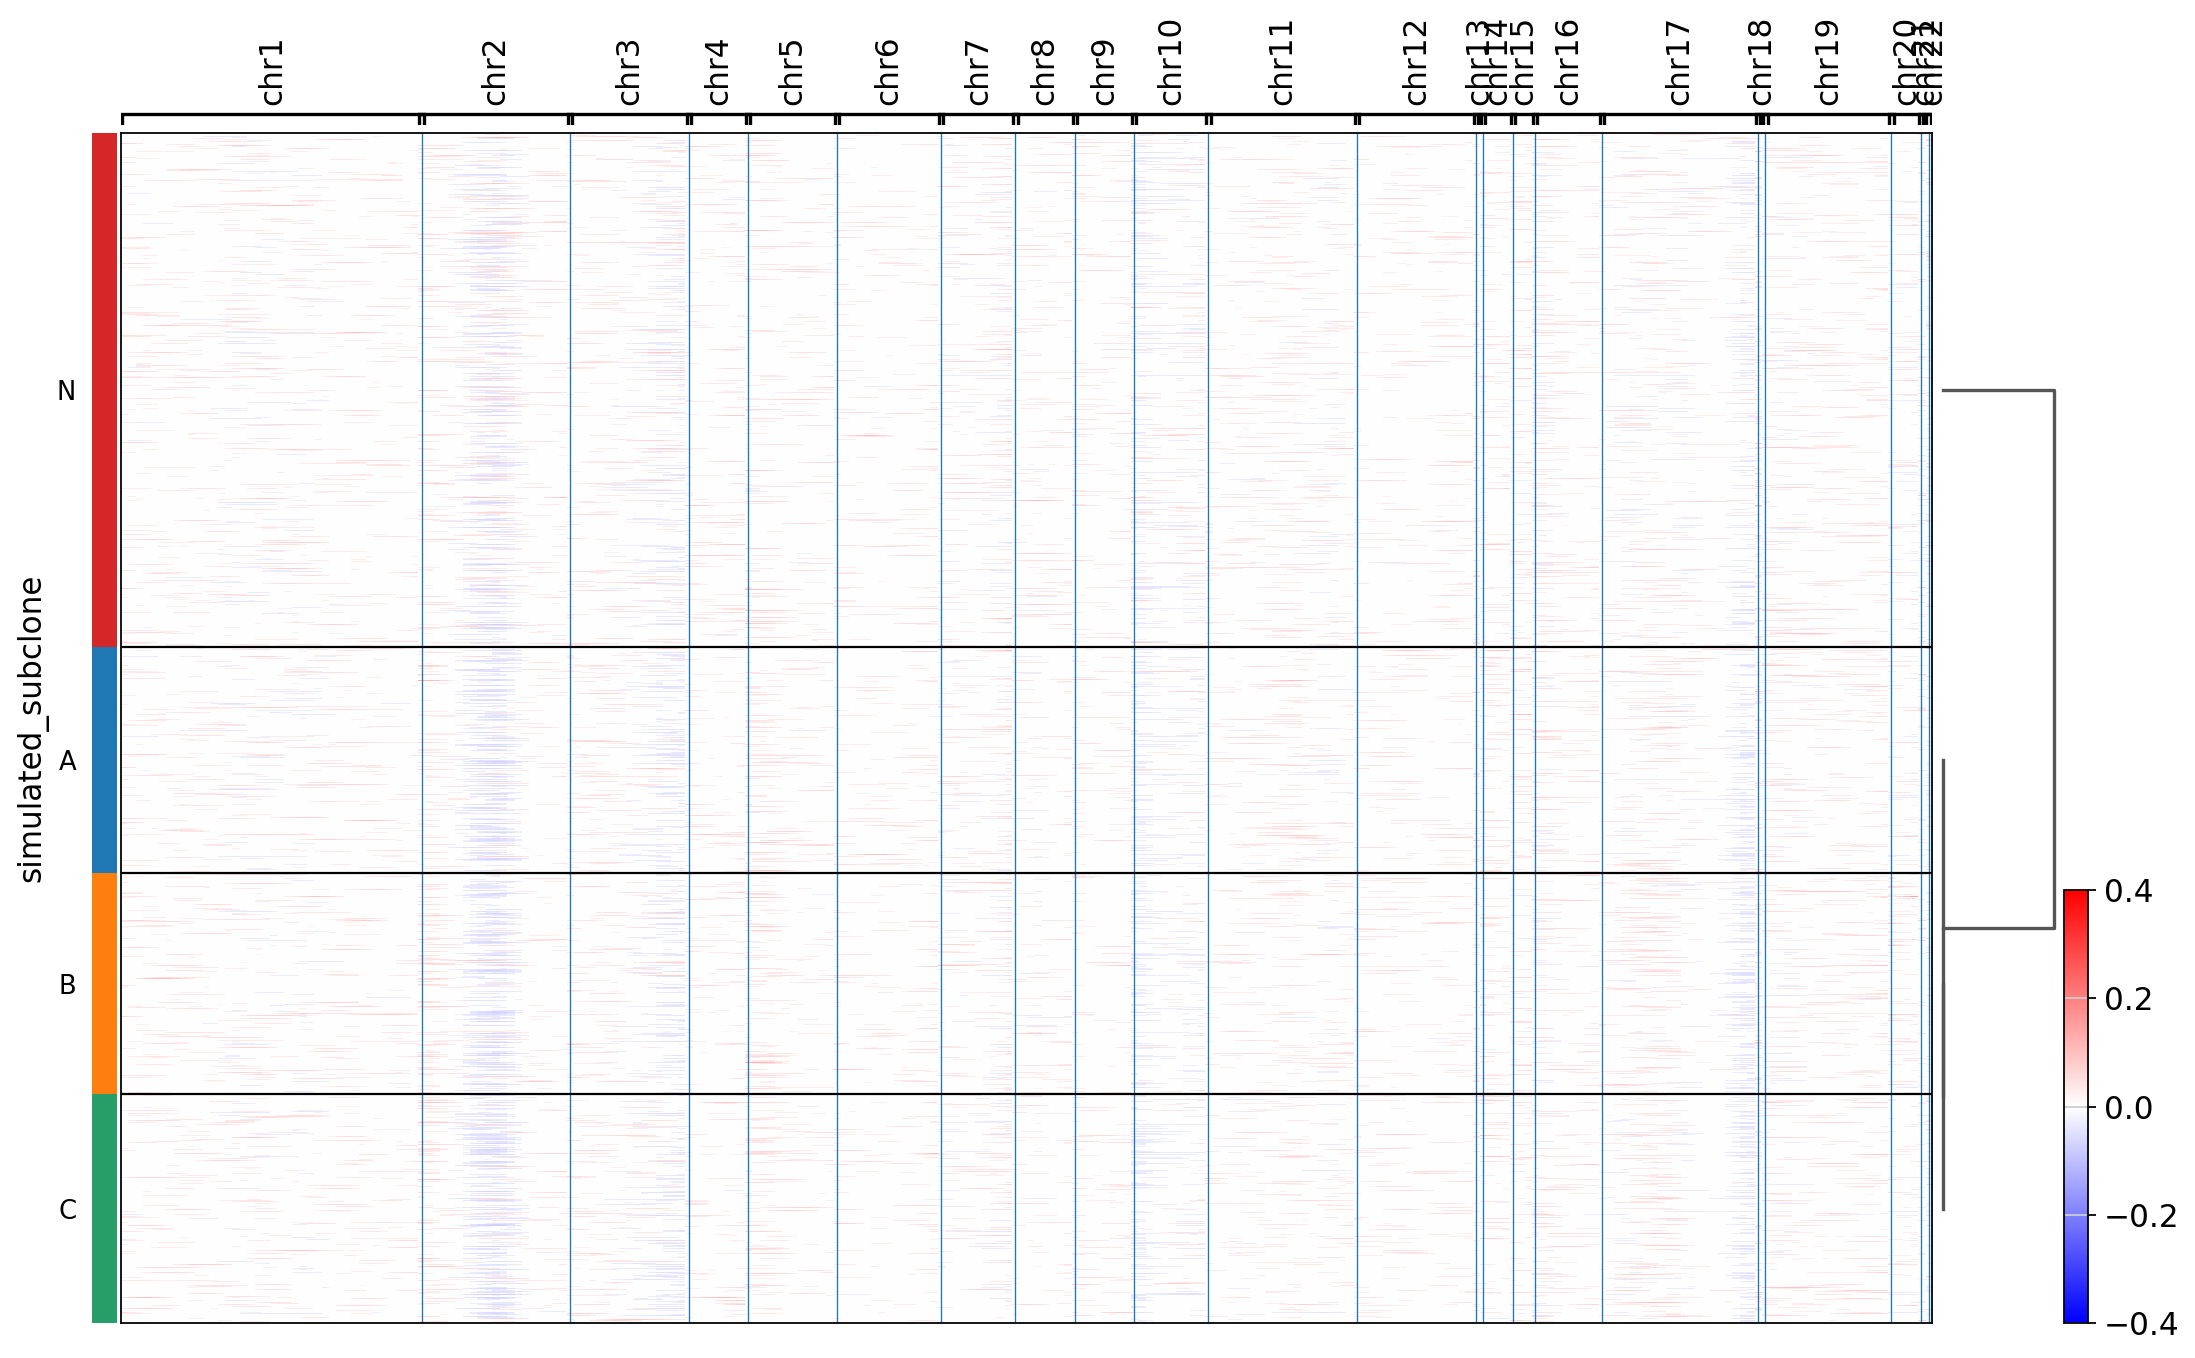

In [25]:
sc.tl.dendrogram(adata,groupby="simulated_subclone")
cnv.pl.chromosome_heatmap(adata, groupby="simulated_subclone", dendrogram=True, vmin=-0.4, vmax=0.4)

### Counts

In [49]:
# We provide all immune cell types as "normal cells".
cnv.tl.infercnv(
    adata,
    window_size=100
)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 33/33 [00:05<00:00,  5.99it/s]


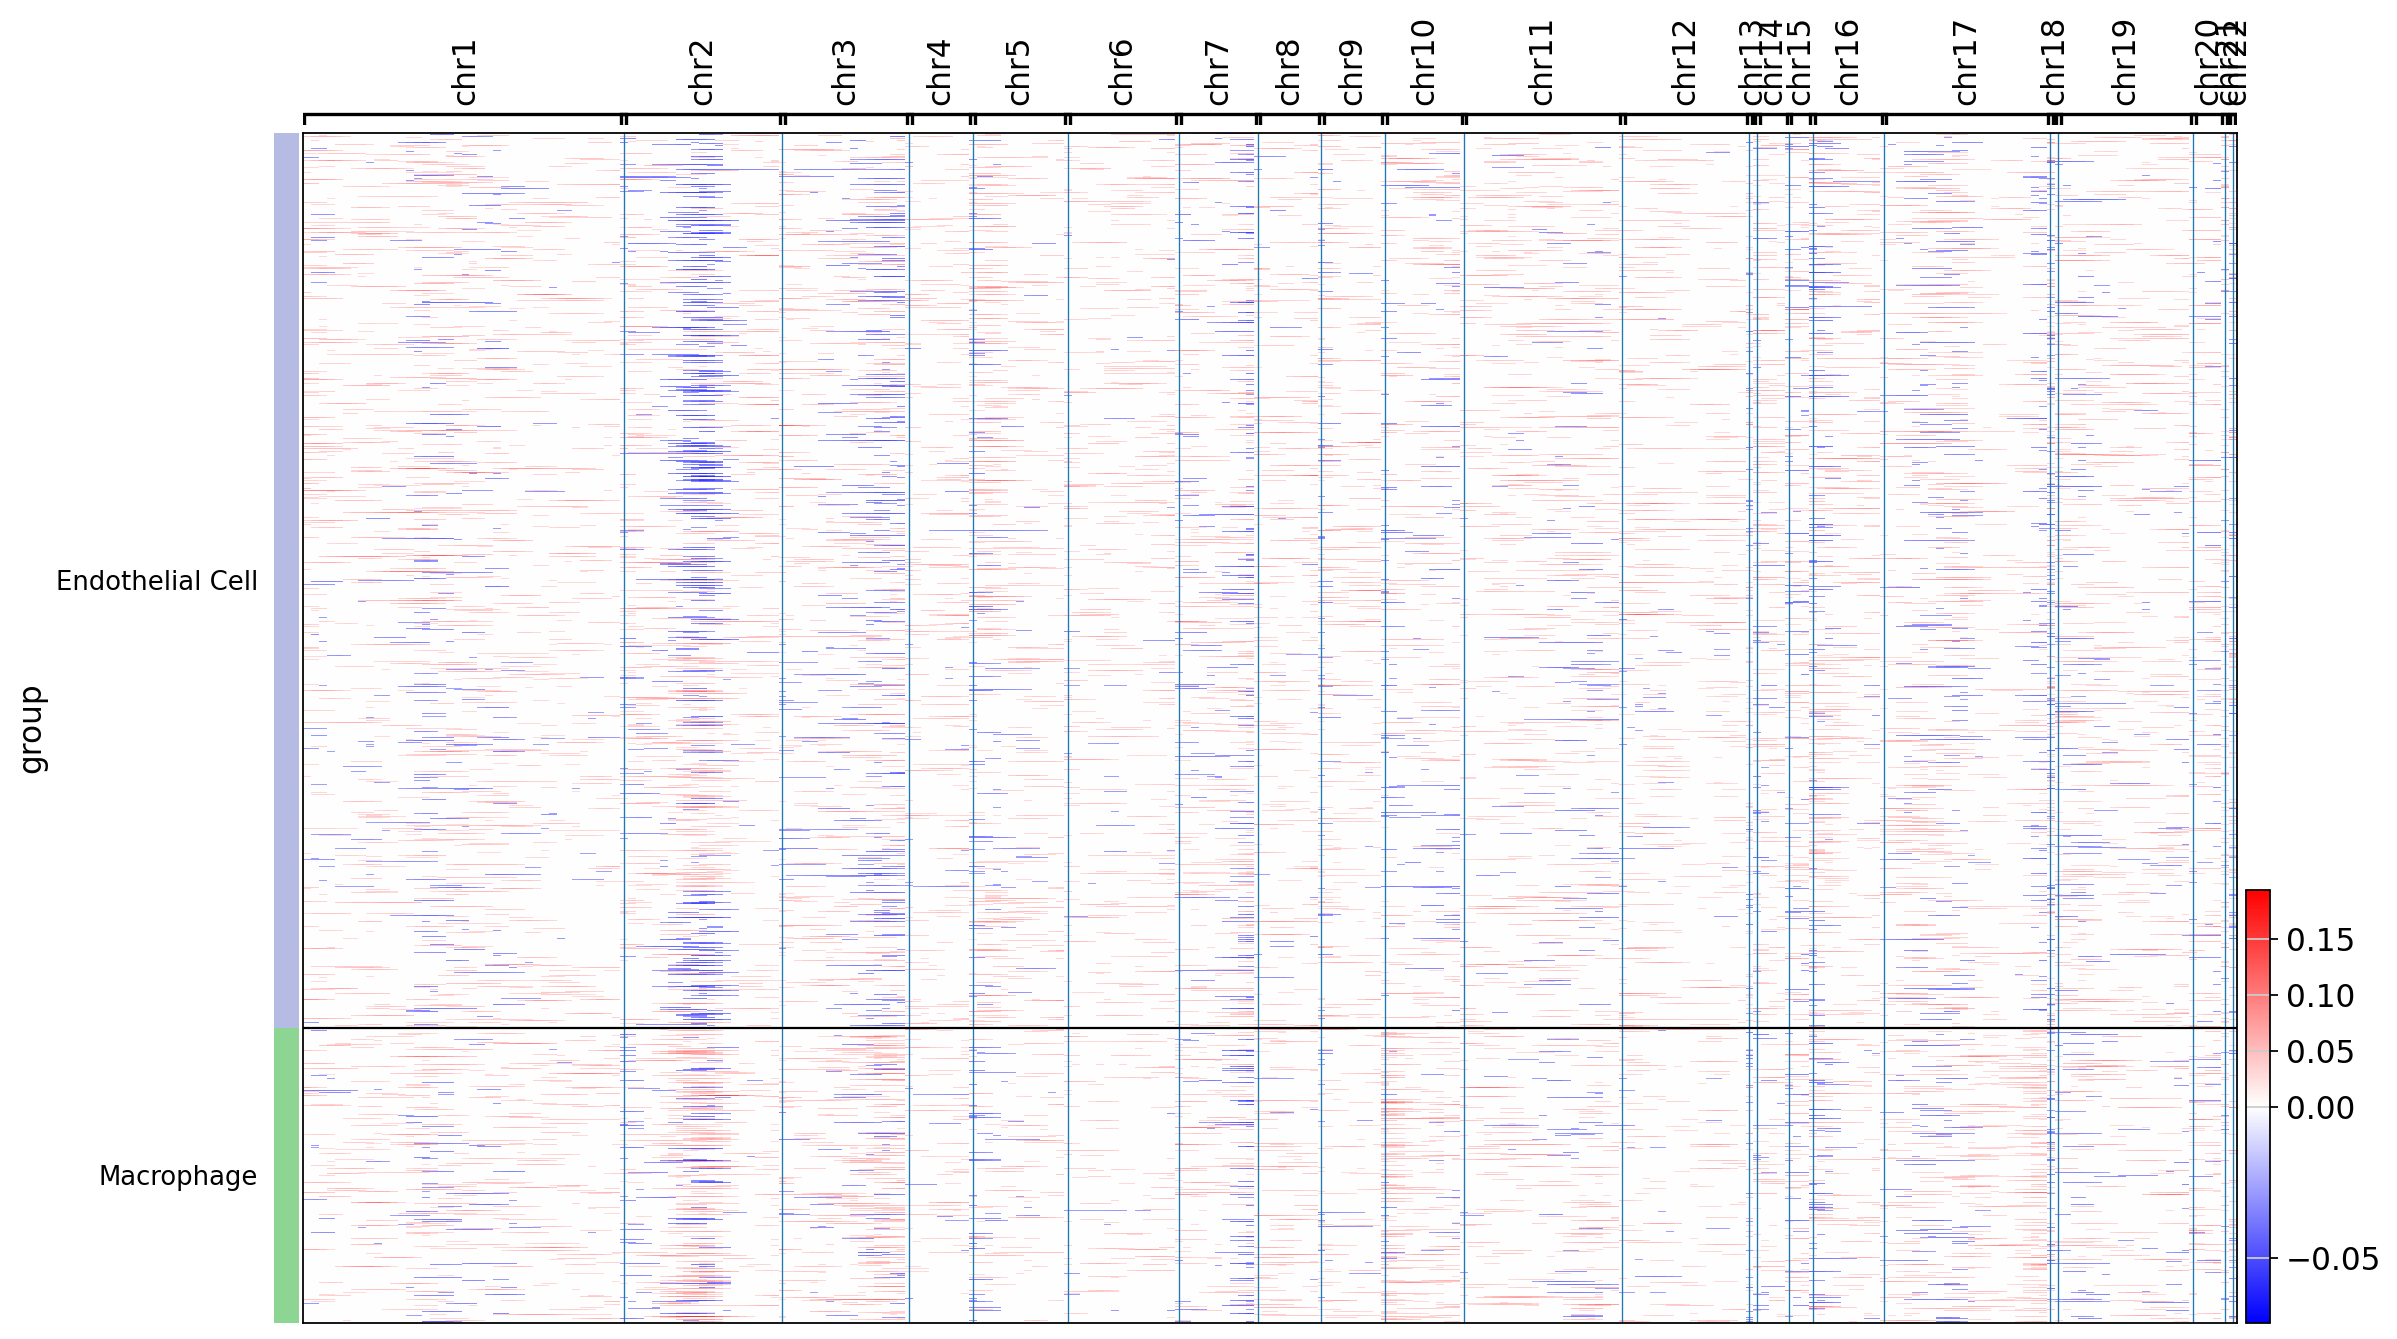

In [50]:
cnv.pl.chromosome_heatmap(adata, groupby="group")

In [51]:
cnv.tl.pca(adata)
cnv.pp.neighbors(adata)
cnv.tl.leiden(adata)

categories: 0, 1, 2, etc.
var_group_labels: chr1, chr2, chr3, etc.


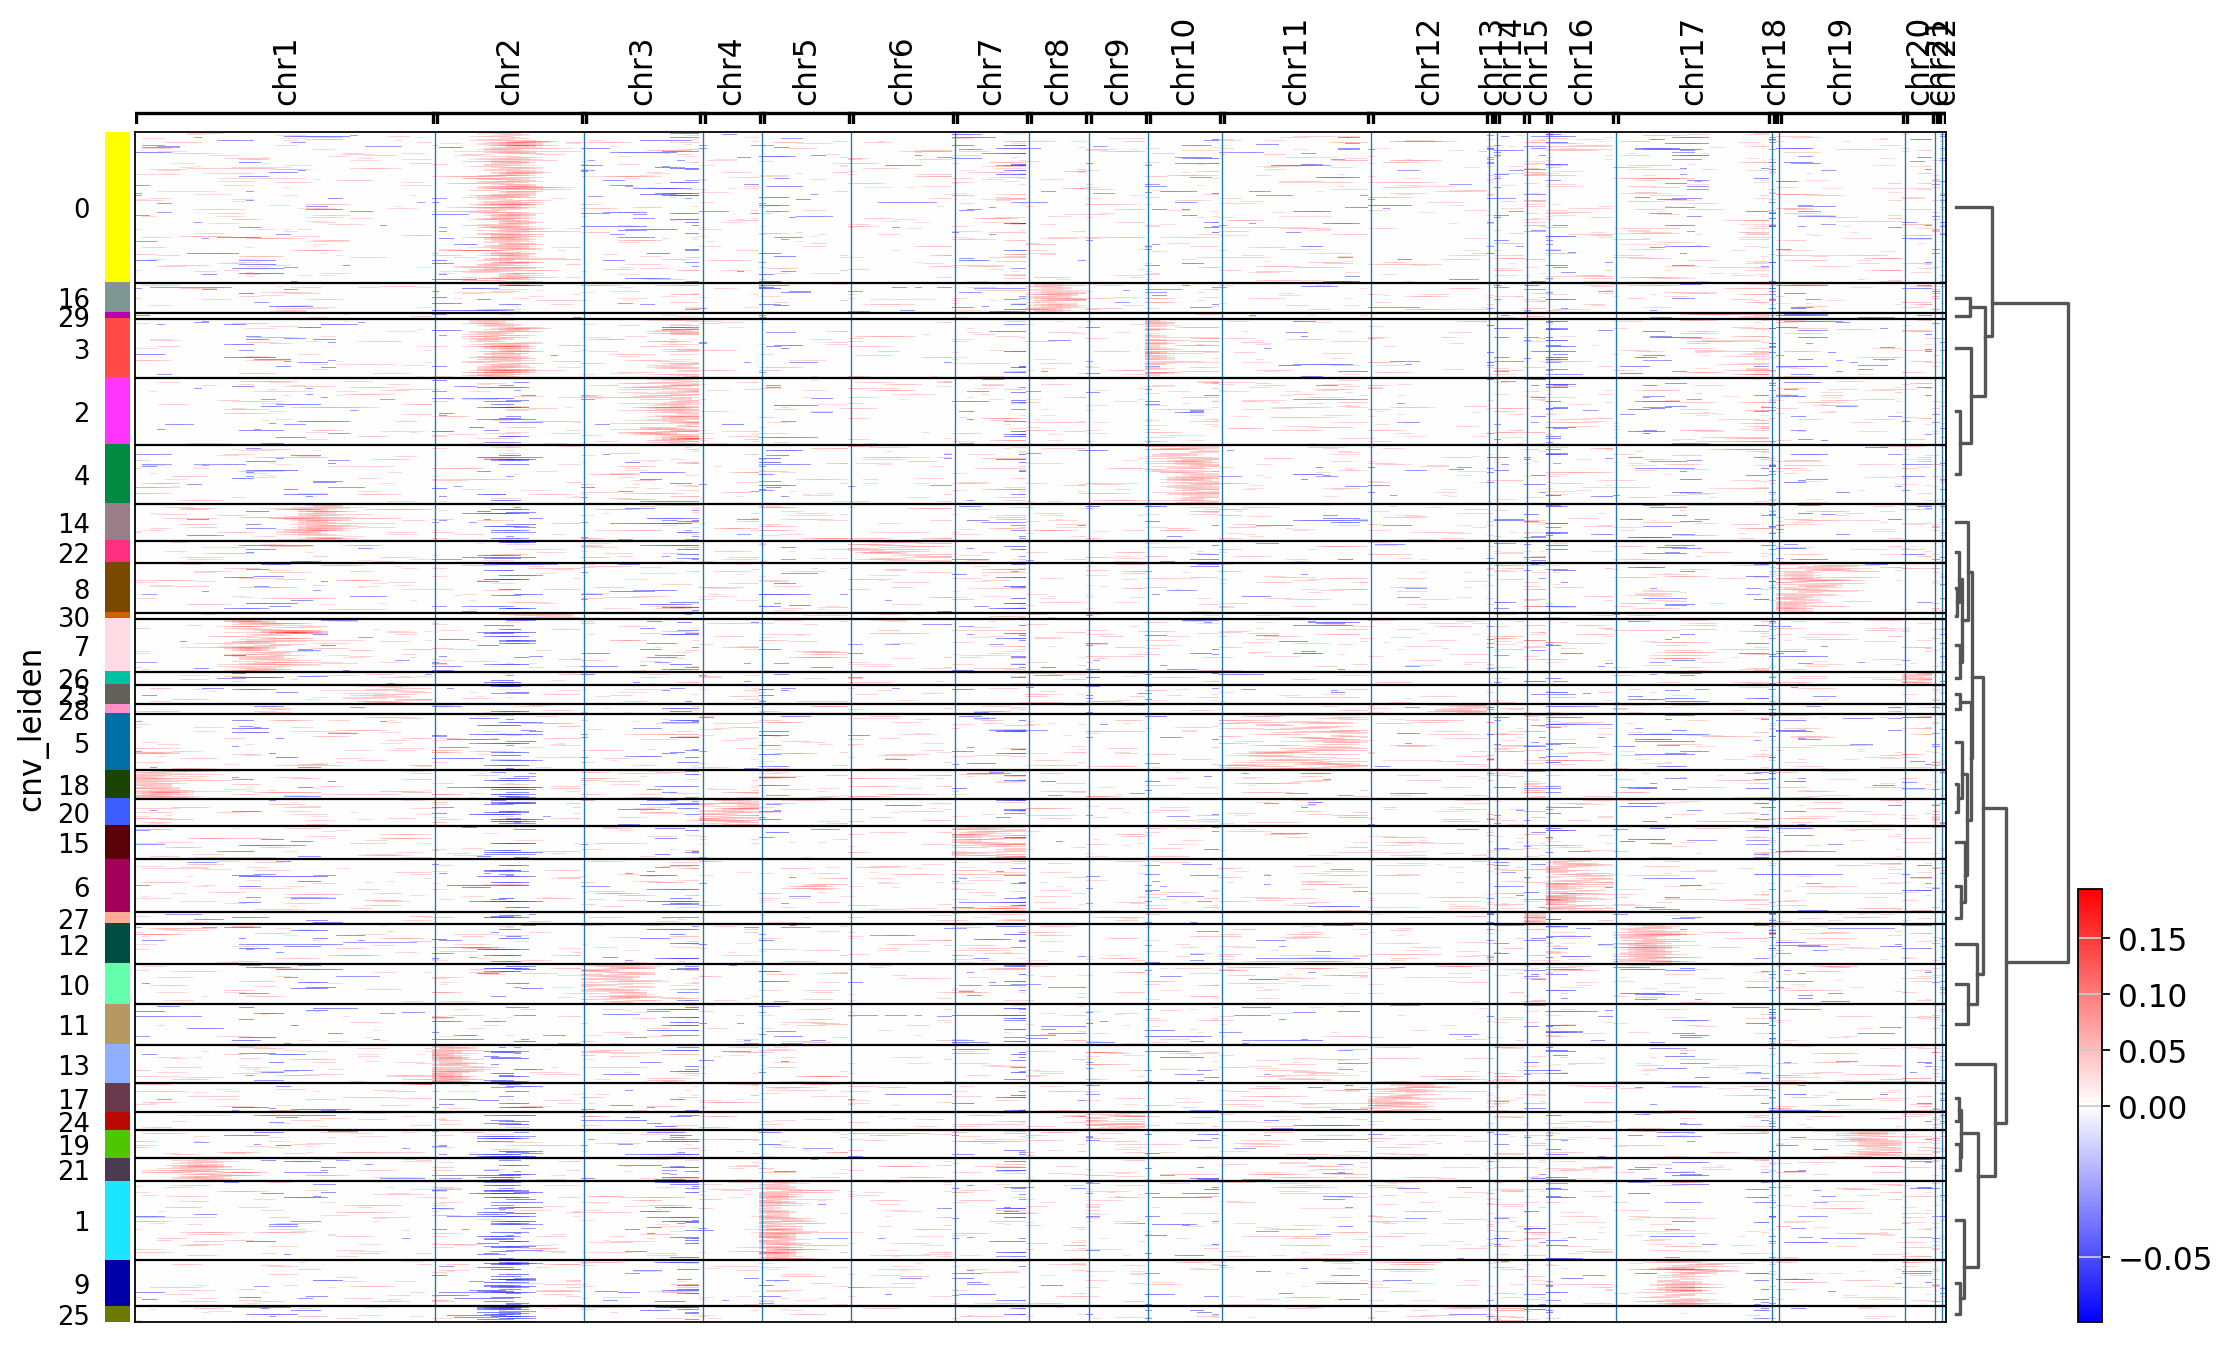

In [52]:
sc.tl.dendrogram(adata,groupby="cnv_leiden")
cnv.pl.chromosome_heatmap(adata, groupby="cnv_leiden", dendrogram=True)

categories: A, B, C, etc.
var_group_labels: chr1, chr2, chr3, etc.


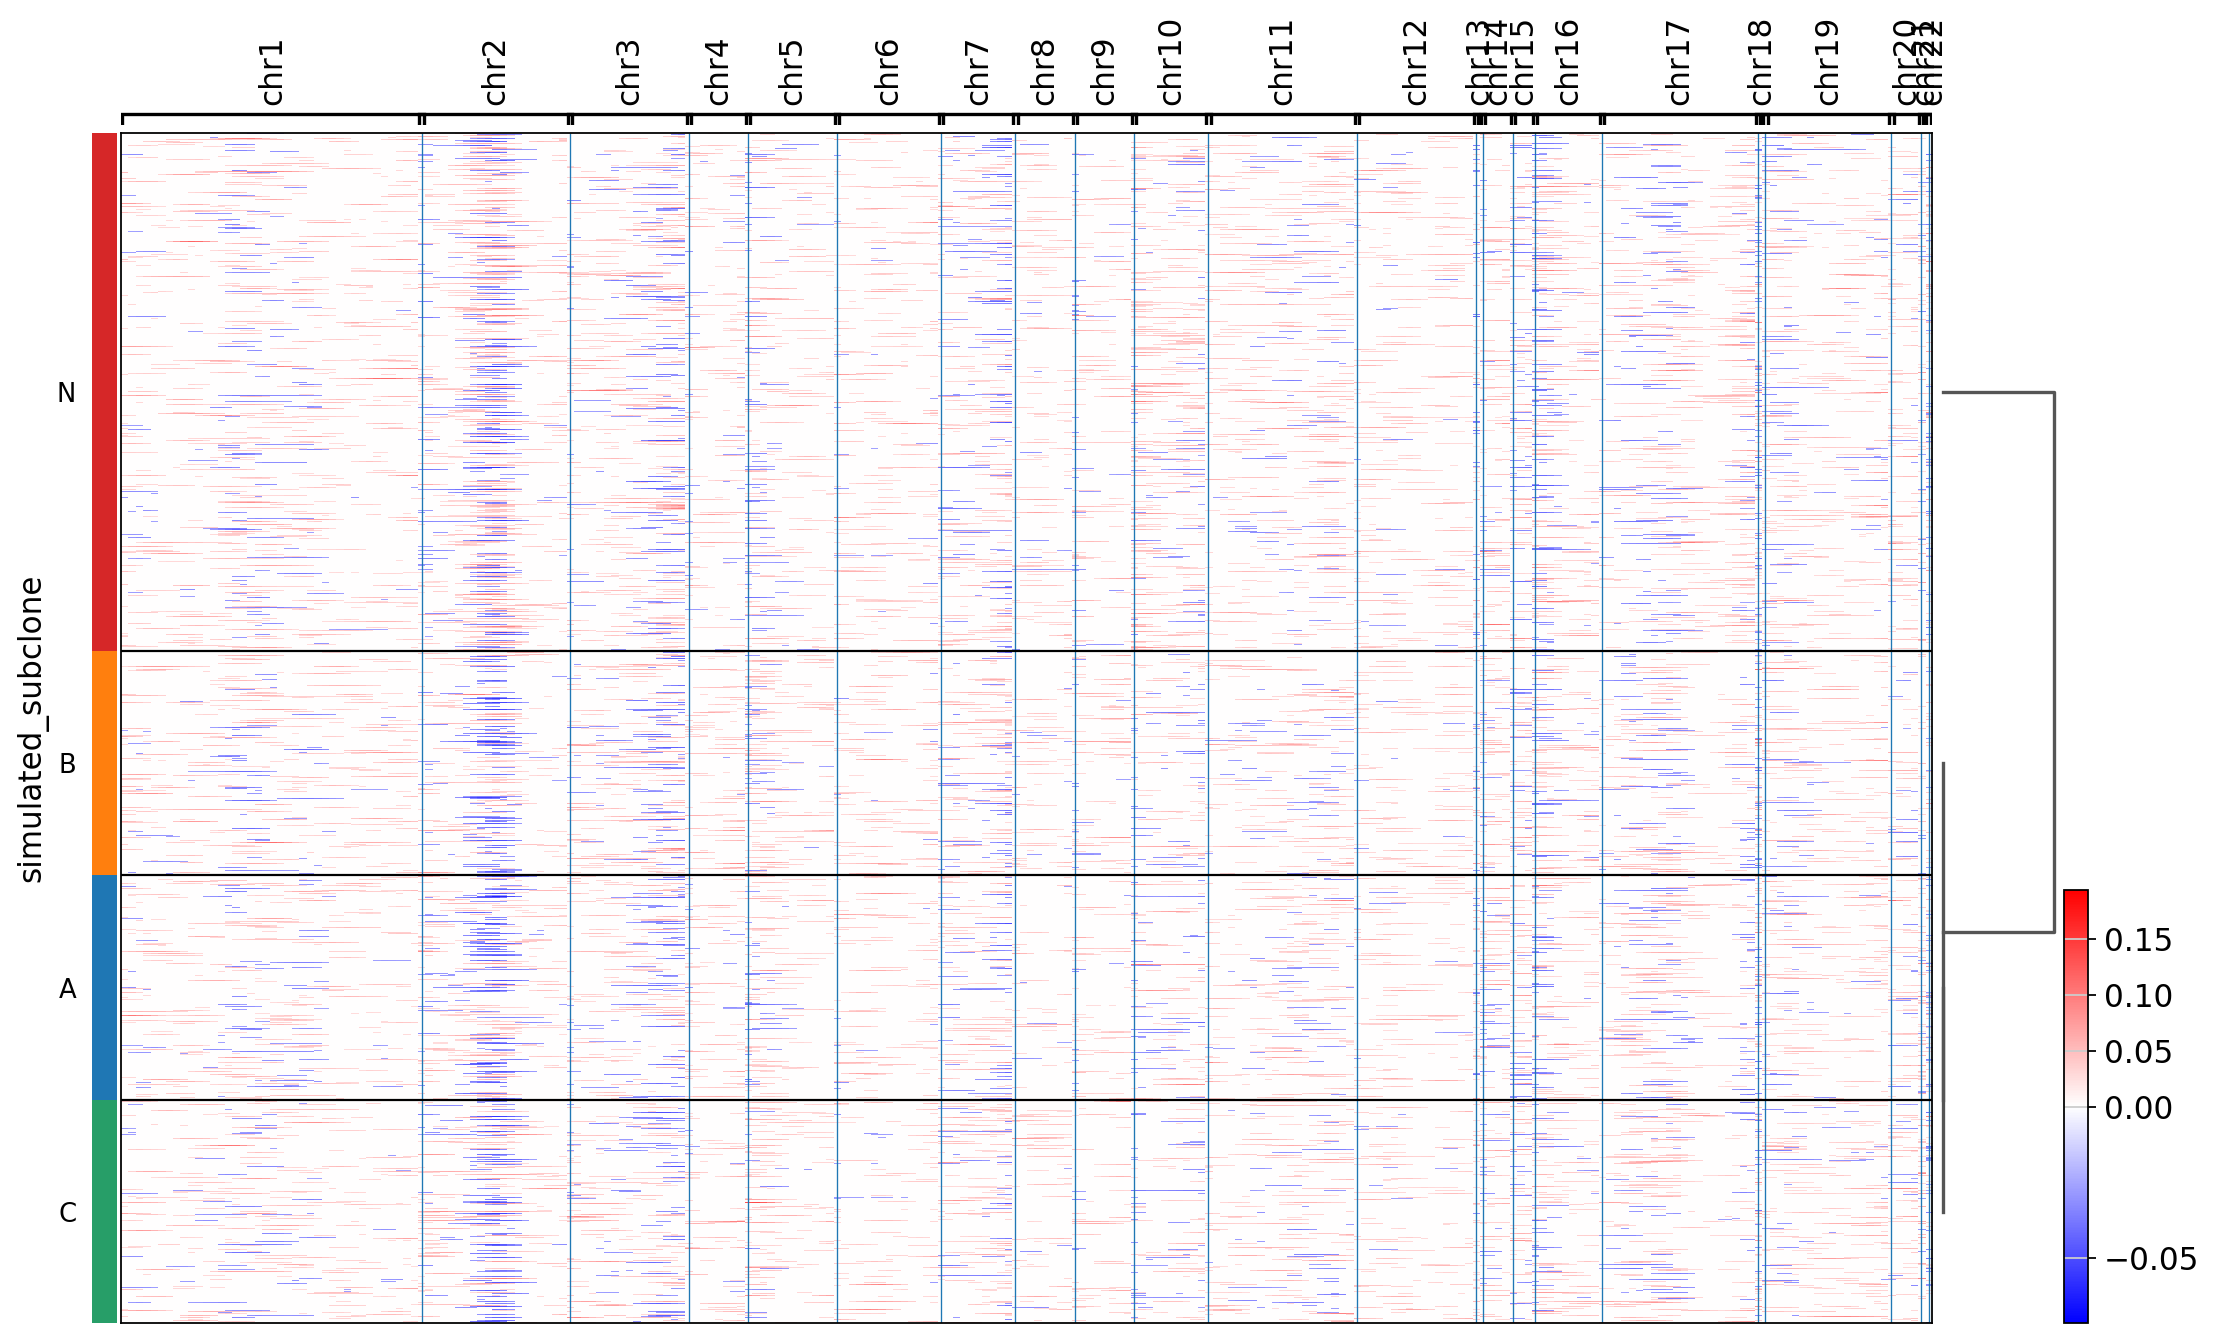

In [53]:
sc.tl.dendrogram(adata,groupby="simulated_subclone")
cnv.pl.chromosome_heatmap(adata, groupby="simulated_subclone", dendrogram=True)